# Project Phase 2- Predictive Modeling in Employee Attrition

**Team Members:** Pouya Khazaeli Pour (Team Manager), Hiba Ahsan, Mourya Bekkanur Dinesh,Tran Le, Sumanth Pulagante

---

**Summary:** This script performs exploratory data analysis and builds predictive models for employee attrition using various machine learning algorithms including:
*   Logistic Regression
*   Random Forest
*   Support Vector Machine (SVM)
*   Decision Tree
*   XGBoost

---
**Statement of Academic Honesty:**
 The following code represents our own work. We have neither received nor given inappropriate assistance. We have not copied or modified code from any source other than the course webpage or the course textbook. We recognize that any unauthorized assistance or plagiarism will be handled in accordance with the Georgia State University's Academic Honesty Policy and the policies of this course. We recognize that my work is based on an assignment created by the Institute for Insight at the Georgia State University. Any publishing
 or posting of source code for this project is strictly prohibited unless you have written consent from the Institute for Insight at the Georgia State University.

## Importing the packages

### Essential libraries for classification project:
- Data manipulation (pandas, numpy) and visualization (matplotlib, seaborn)
- 5 classification algorithms (Logistic Regression, SVM, Random Forest, Decision Tree, XGBoost)
- Preprocessing (StandardScaler, LabelEncoder, train-test split)
- Evaluation metrics (accuracy, precision, recall, F1-score, ROC-AUC, confusion matrix)
- Improvement strategies (GridSearchCV for hyperparameter tuning, SMOTE for class imbalance)

In [114]:
# LIBRARY IMPORTS

# Core Data Manipulation & Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

# Machine Learning - Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning - Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Machine Learning - Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc,
    ConfusionMatrixDisplay, precision_recall_fscore_support,
    roc_auc_score
)

#  Machine Learning - Hyperparameter Optimization & Cross-Validation
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#  Class Imbalance Handling - Synthetic Oversampling
from imblearn.over_sampling import SMOTE


## Data Loading and Initial Exploration
---

Purpose: Load IBM HR dataset and perform preliminary analysis
- Load 1,470 employee records with 35 features
- Inspect data structure, types, and completeness
- Analyze target variable (Attrition) distribution and imbalance ratio


In [115]:
# Load the employee attrition dataset and perform initial data exploration

print("\n" + "=" * 60)
print("LOADING DATA")
print("=" * 60)

# Load dataset from CSV file
df = pd.read_csv("Dataset.csv")
print(f"\nDataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n" + "=" * 60)
print("INITIAL DATA EXPLORATION")
print("=" * 60)

# Display first few rows to understand data structure
print("\nFirst 5 rows:")
print(df.head())

# Get detailed information about the dataset
print("\nDataset Info:")
df.info()

# List all column names
print("\nColumn Names:")
print(df.columns.tolist())

# Count data types distribution
print("\nData Types:")
print(df.dtypes.value_counts())

# Analyze target variable distribution
print("\nTarget Variable Distribution:")
print(df['Attrition'].value_counts())
print(f"\nAttrition Rate: {(df['Attrition'].value_counts()['Yes'] / len(df)) * 100:.2f}%")


LOADING DATA

Dataset Shape: (1470, 35)
Rows: 1470, Columns: 35

INITIAL DATA EXPLORATION

First 5 rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical    

# Descriptive Statistics
---

Calculate key summary statistics and comparative analysis:
- Overall dataset statistics (age range, income distribution)
- Segmented analysis: Compare employees who left vs stayed
- Identify patterns differentiating attrition groups


In [116]:


# Calculate and display key statistical measures to understand
print("\n" + "=" * 60)
print(" DESCRIPTIVE STATISTICS")
print("=" * 60)

# Analyze age distribution across the dataset
print(f"\nAge range: {df['Age'].min()}-{df['Age'].max()}, Mean: {df['Age'].mean():.1f}")

# Analyze monthly income distribution
print(f"Monthly Income (mean): ${df['MonthlyIncome'].mean():,.0f}, (median): ${df['MonthlyIncome'].median():,.0f}")

# Segmented analysis: Compare leavers vs stayers
leavers = df[df['Attrition']=='Yes']
stayers = df[df['Attrition']=='No']

print(f"Leavers mean age: {leavers['Age'].mean():.1f}, Stayers mean age: {stayers['Age'].mean():.1f}")
# Group statistics by attrition status
print("\nGrouped Statistics by Attrition:")
print(df.groupby('Attrition').describe())



 DESCRIPTIVE STATISTICS

Age range: 18-60, Mean: 36.9
Monthly Income (mean): $6,503, (median): $4,919
Leavers mean age: 33.6, Stayers mean age: 37.6

Grouped Statistics by Attrition:
              Age                                                   DailyRate  \
            count       mean      std   min   25%   50%   75%   max     count   
Attrition                                                                       
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0    1233.0   
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0     237.0   

                       ... YearsSinceLastPromotion       YearsWithCurrManager  \
                 mean  ...                     75%   max                count   
Attrition              ...                                                      
No         812.504461  ...                     3.0  15.0               1233.0   
Yes        750.362869  ...                     2.0  15.0                237.0   

    

# Data Quality Checks

---
Comprehensive data quality checks to ensure clean, valid data:
- Missing values detection (expect: 0 missing)
- Duplicate records identification
- Constant/near-constant feature detection (candidates for removal)
- Column type classification (numeric vs categorical)


In [117]:
# Perform comprehensive data quality assessment like  missing values,
print("\n" + "=" * 60)
print(" DATA QUALITY CHECKS")
print("=" * 60)

# Check for missing values across all columns
print("\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found!")
else:
    print(missing[missing > 0])

# Check for duplicate rows
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Identify columns with no variance (single unique value)
# These columns provide no predictive value and should be removed
print("\nColumns with Single Unique Value:")
const_cols = [col for col in df.columns if df[col].nunique() == 1]
if const_cols:
    print(f"Found {len(const_cols)} constant columns: {const_cols}")
    print("These columns will be removed as they provide no predictive value.")
else:
    print("No constant columns found!")

# Identify near-constant columns (>95% same value)
# These may indicate low variance features
near_const_cols = []
for col in df.columns:
    if df[col].value_counts(normalize=True).iloc[0] > 0.95:
        near_const_cols.append(col)

if near_const_cols:
    print(f"\nColumns with >95% same value (near-constant): {near_const_cols}")

# Separate numeric and categorical columns for different preprocessing
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nNumeric Columns ({len(numeric_cols)}): {numeric_cols[:5]}...")
print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")



 DATA QUALITY CHECKS

Missing Values:
No missing values found!

Duplicate Rows: 0

Columns with Single Unique Value:
Found 3 constant columns: ['EmployeeCount', 'Over18', 'StandardHours']
These columns will be removed as they provide no predictive value.

Columns with >95% same value (near-constant): ['EmployeeCount', 'Over18', 'StandardHours']

Numeric Columns (26): ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount']...
Categorical Columns (9): ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


# Data Pre-processing and Encoding
---
Transform data for machine learning model compatibility:
- Remove constant columns (EmployeeCount, StandardHours, Over18, EmployeeNumber)
- Encode target variable (Attrition: No=0, Yes=1)
- Encode categorical features using manual mapping (8 features total)
- Binary encoding: Gender, OverTime
- Ordinal encoding: Department, BusinessTravel, MaritalStatus, EducationField, JobRole

In [118]:
# Transform categorical variables into numerical format using label encoding
print("\n" + "=" * 60)
print(" DATA PREPROCESSING")
print("=" * 60)

# Create a copy for preprocessing to preserve original data
df_processed = df.copy()
# Remove constant columns if they exist
if const_cols:
    cols_to_remove = [col for col in const_cols if col in df_processed.columns]
    if cols_to_remove:
        df_processed = df_processed.drop(columns=cols_to_remove)
        print(f"Removed {len(cols_to_remove)} constant columns: {cols_to_remove}")

# Encode categorical variables using binary or ordinal mapping
print("\nEncoding categorical variables...")

# Binary encoding: Male=0, Female=1
df_processed["Gender"] = df_processed["Gender"].map({"Male": 0, "Female": 1})
print("Encoded Gender")

# Binary encoding for target variable: No=0, Yes=1
df_processed["Attrition"] = df_processed["Attrition"].map({"No": 0, "Yes": 1})
print("Encoded Attrition (Target)")

# Binary encoding: No=0, Yes=1
df_processed["OverTime"] = df_processed["OverTime"].map({"No": 0, "Yes": 1})
print("Encoded OverTime")

# Ordinal encoding for Department (3 categories)
df_processed["Department"] = df_processed["Department"].map({
    "Sales": 0,
    "Research & Development": 1,
    "Human Resources": 2
})
print("Encoded Department")

# Ordinal encoding for BusinessTravel (ordered by travel frequency)
df_processed["BusinessTravel"] = df_processed["BusinessTravel"].map({
    "Non-Travel": 0,
    "Travel_Rarely": 1,
    "Travel_Frequently": 2
}).astype("Int64")
print("Encoded BusinessTravel")

# Ordinal encoding for MaritalStatus (3 categories)
df_processed["MaritalStatus"] = df_processed["MaritalStatus"].map({
    "Single": 0,
    "Married": 1,
    "Divorced": 2
})
print("Encoded MaritalStatus")

# Ordinal encoding for EducationField (6 categories)
df_processed["EducationField"] = df_processed["EducationField"].map({
    "Life Sciences": 0,
    "Medical": 1,
    "Marketing": 2,
    "Technical Degree": 3,
    "Other": 4,
    "Human Resources": 5
})
print("Encoded EducationField")

# Ordinal encoding for JobRole (9 categories)
df_processed["JobRole"] = df_processed["JobRole"].map({
    "Sales Executive": 0,
    "Research Scientist": 1,
    "Laboratory Technician": 2,
    "Manufacturing Director": 3,
    "Healthcare Representative": 4,
    "Manager": 5,
    "Sales Representative": 6,
    "Research Director": 7,
    "Human Resources": 8
})
print("Encoded JobRole")
print(f"\nFinal processed shape: {df_processed.shape}")



 DATA PREPROCESSING
Removed 3 constant columns: ['EmployeeCount', 'Over18', 'StandardHours']

Encoding categorical variables...
Encoded Gender
Encoded Attrition (Target)
Encoded OverTime
Encoded Department
Encoded BusinessTravel
Encoded MaritalStatus
Encoded EducationField
Encoded JobRole

Final processed shape: (1470, 32)


# Class Imbalance Analysis
---
Analyze target variable (Attrition) distribution to identify class imbalance:
- Calculate attrition counts and percentages
- Compute imbalance ratio (No/Yes)
- Visualize distribution using bar chart and pie chart
Finding: Severe imbalance - 84% No (1,233) vs 16% Yes (237), ratio 5.2:1



 CLASS IMBALANCE ANALYSIS
No (0): 1233 (83.9%)
Yes(1): 237 (16.1%)
Imbalanced Ratio: 5.20

Creating visualizations for Target Variable Analysis



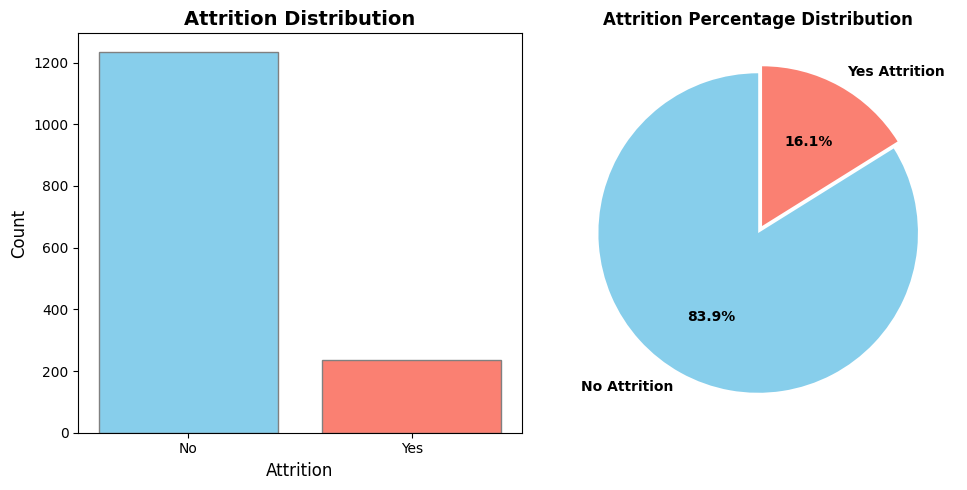

In [119]:
# Analyze the distribution of target variable (Attrition)
print("\n" + "=" * 60)
print(" CLASS IMBALANCE ANALYSIS")
print("=" * 60)
attrition_counts = df_processed['Attrition'].value_counts()
imbalance_ratio = attrition_counts.iloc[0] / attrition_counts.iloc[1]
print(f"No (0): {attrition_counts.iloc[0]} ({attrition_counts.iloc[0]/len(df_processed)*100:.1f}%)")
print(f"Yes(1): {attrition_counts.iloc[1]} ({attrition_counts.iloc[1]/len(df_processed)*100:.1f}%)")
print(f"Imbalanced Ratio: {imbalance_ratio:.2f}")
print("\nCreating visualizations for Target Variable Analysis\n")

# Visualize class distribution using bar chart and pie chart
# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
colors = ['skyblue', 'salmon']
# Bar chart showing count of each class
ax1.bar(['No', 'Yes'], attrition_counts.values,
        color=colors, edgecolor='grey', linewidth=1)
ax1.set_title('Attrition Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('Attrition', fontsize=12)

# Pie chart showing percentage distribution
explode = (0, 0.05)  # Explode the second slice for emphasis
ax2.pie([attrition_counts.iloc[0], attrition_counts.iloc[1]],
        labels=['No Attrition', 'Yes Attrition'],
        autopct='%1.1f%%', colors=colors, explode=explode,
        startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax2.set_title('Attrition Percentage Distribution', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('attrition_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


# Exploratory Data Analysis (EDA)
---
Analyze feature relationships and identify key predictors:
- Calculate correlation matrix for all numerical features
- Visualize feature correlations using heatmap
- Identify top 10 features most correlated with Attrition
- Detect multicollinearity (|correlation| > 0.8) between feature pairs
Finding: OverTime, Age, YearsAtCompany show strongest correlation with Attrition



 EXPLORATORY DATA ANALYSIS

--- Correlation Analysis ---


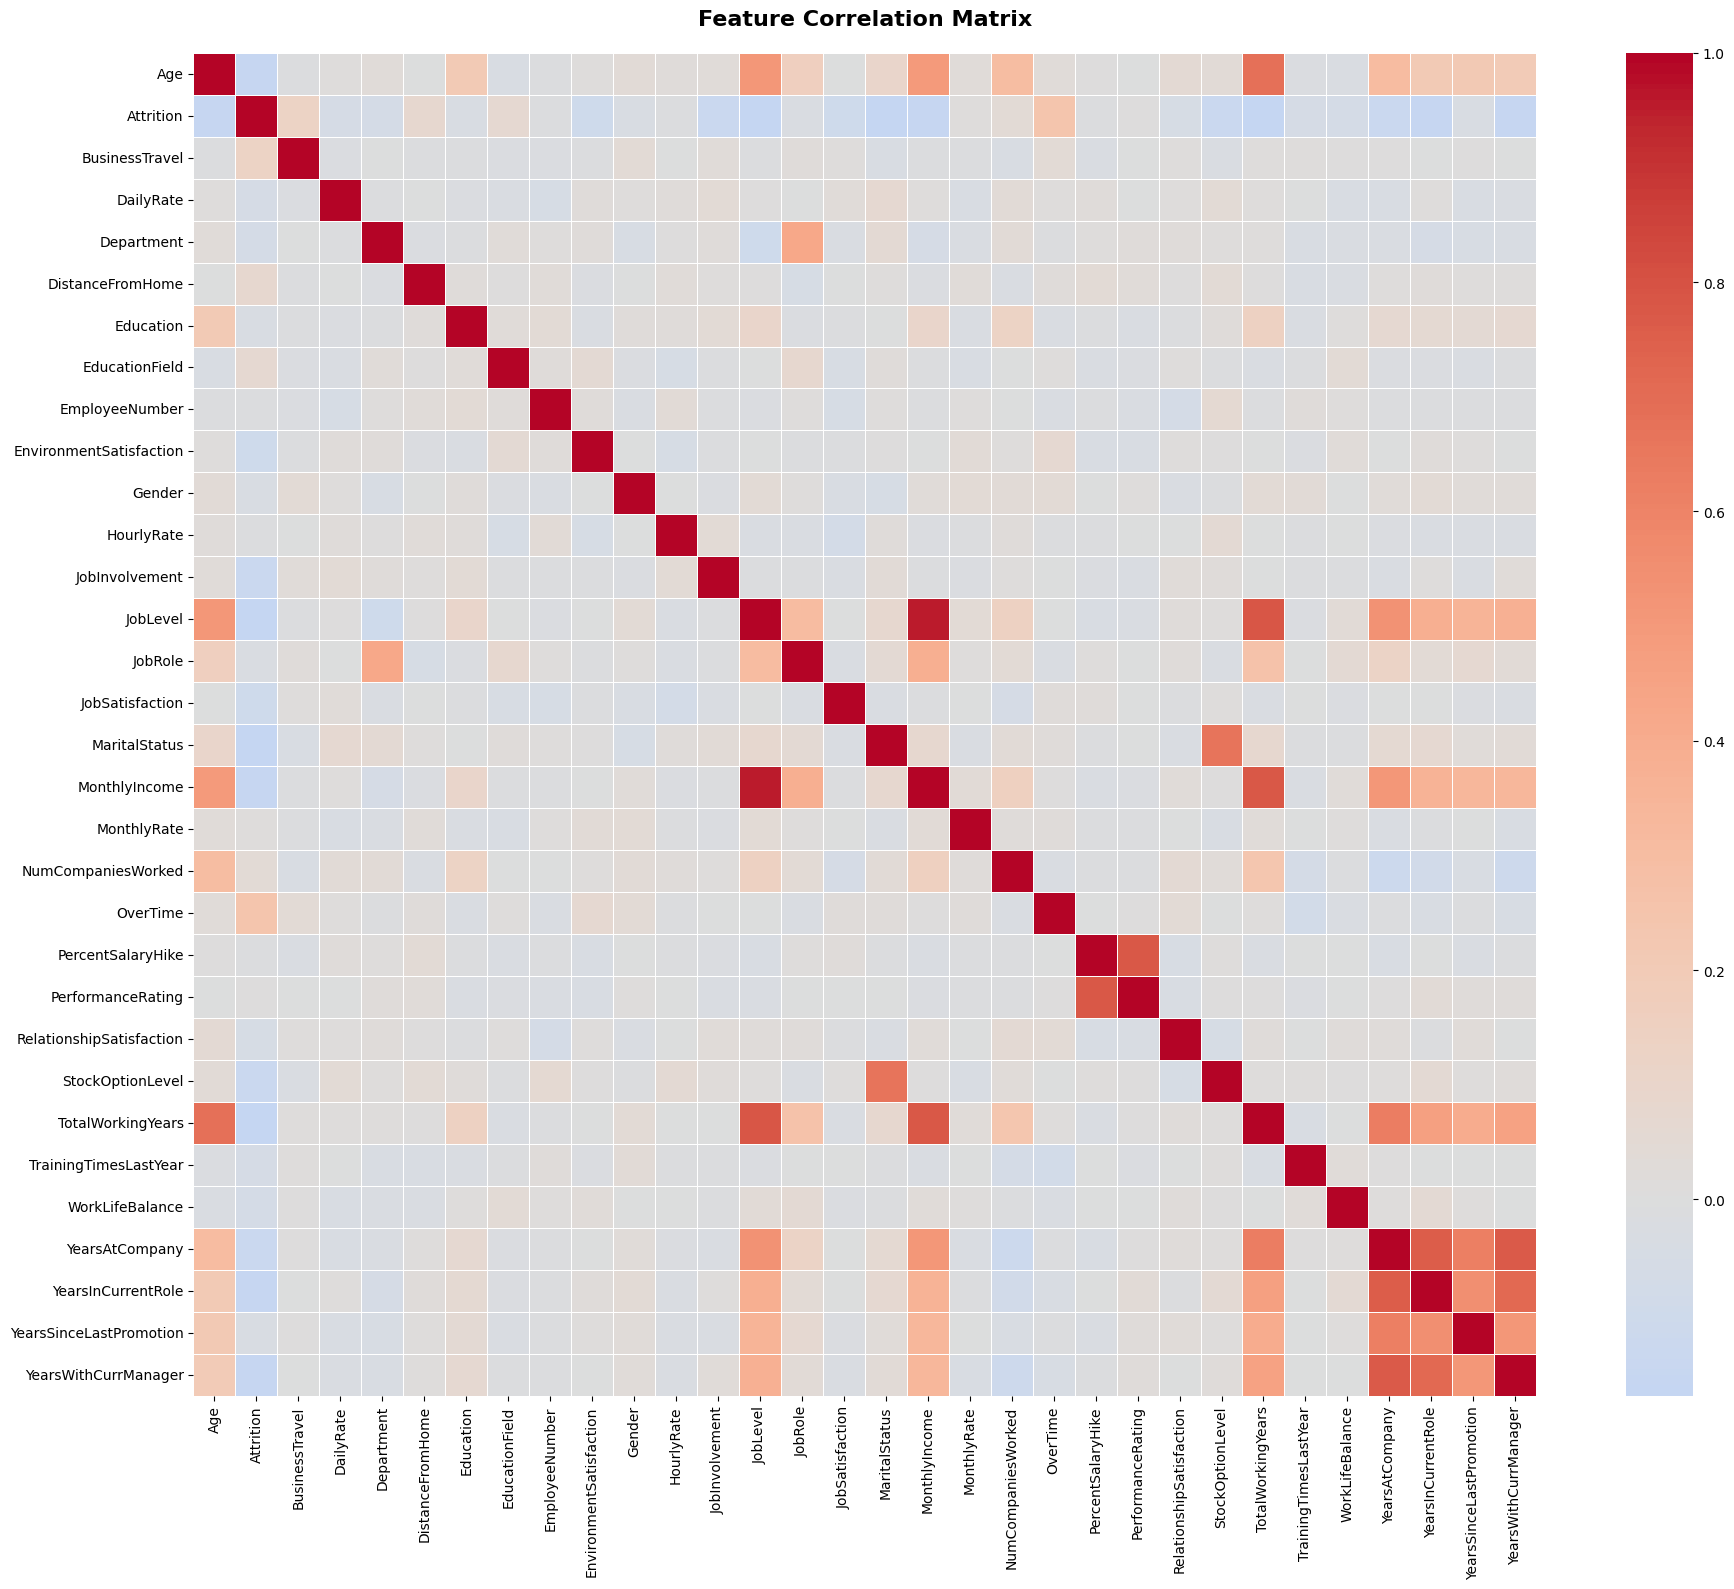


Top 10 Features Correlated with Attrition:
Attrition               1.000000
OverTime                0.246118
TotalWorkingYears       0.171063
JobLevel                0.169105
MaritalStatus           0.162070
YearsInCurrentRole      0.160545
MonthlyIncome           0.159840
Age                     0.159205
YearsWithCurrManager    0.156199
StockOptionLevel        0.137145
YearsAtCompany          0.134392
Name: Attrition, dtype: float64


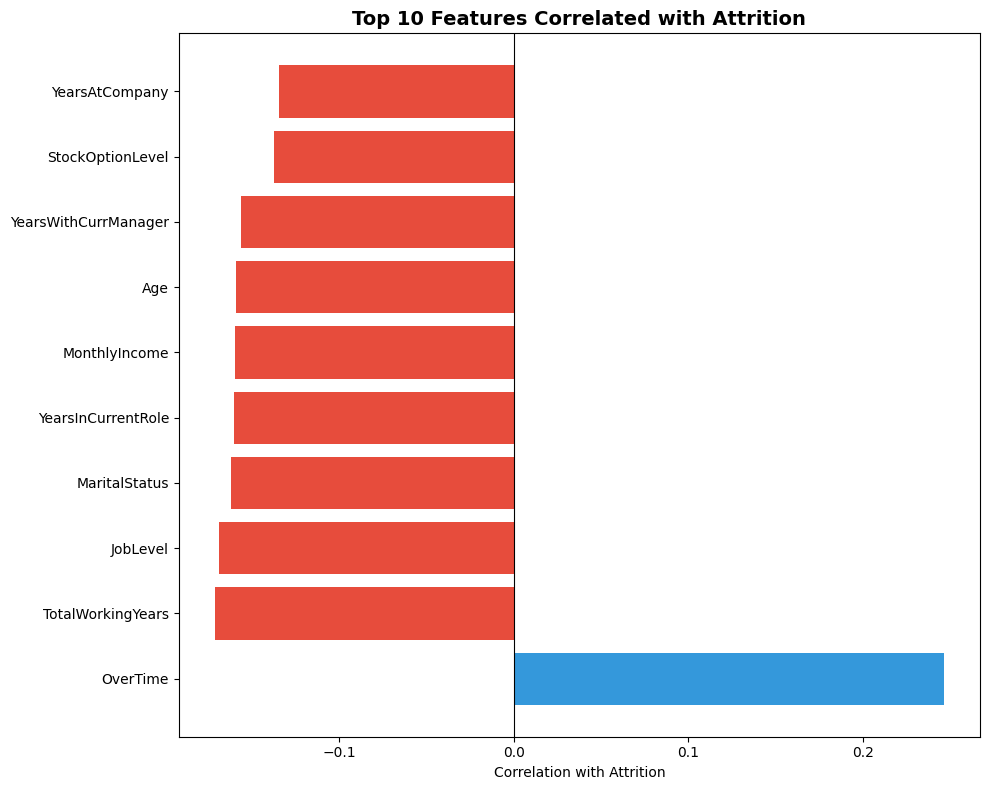


--- Multicollinearity Detection ---

Found 1 highly correlated feature pairs (|corr| > 0.8):
  Feature 1      Feature 2  Correlation
0  JobLevel  MonthlyIncome       0.9503

Consider removing one feature from each pair to reduce multicollinearity.


In [120]:
# Perform correlation analysis to identify relationships between features
print("\n" + "=" * 60)
print(" EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# Calculate correlation matrix for all numerical features
print("\n--- Correlation Analysis ---")
corr_matrix = df_processed.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify features most correlated with target variable
print("\nTop 10 Features Correlated with Attrition:")
attrition_corr = corr_matrix['Attrition'].abs().sort_values(ascending=False)
print(attrition_corr.head(11))

# Visualize top correlations with target variable
plt.figure(figsize=(10, 8))
top_features = attrition_corr.head(11).index[1:]  # Exclude Attrition itself
corr_values = corr_matrix.loc[top_features, 'Attrition']
colors_bar = ['#e74c3c' if x < 0 else '#3498db' for x in corr_values]  # Red for negative, blue for positive
plt.barh(top_features, corr_values, color=colors_bar)
plt.xlabel('Correlation with Attrition')
plt.title('Top 10 Features Correlated with Attrition', fontweight='bold', fontsize=14)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.savefig('top_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# Detect multicollinearity: highly correlated feature pairs
# High correlation between features (>0.8) may cause multicollinearity
print("\n--- Multicollinearity Detection ---")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })
if high_corr_pairs:
    print(f"\nFound {len(high_corr_pairs)} highly correlated feature pairs (|corr| > 0.8):")
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print(high_corr_df)
    print("\nConsider removing one feature from each pair to reduce multicollinearity.")
else:
    print("No severe multicollinearity detected (|corr| > 0.8)")

# Feature Distribution Analysis
---
Analyze distribution patterns of key numerical features:
- Overall distribution with mean/median annotations (9 features)
- Comparative distribution: departed vs retained employees
- Identify skewness, outliers, and differences between attrition groups
- Visualization: 3×3 grid histograms for Age, Income, Tenure, etc.



 FEATURE DISTRIBUTION ANALYSIS

Analyzing distribution of 9 key numerical features


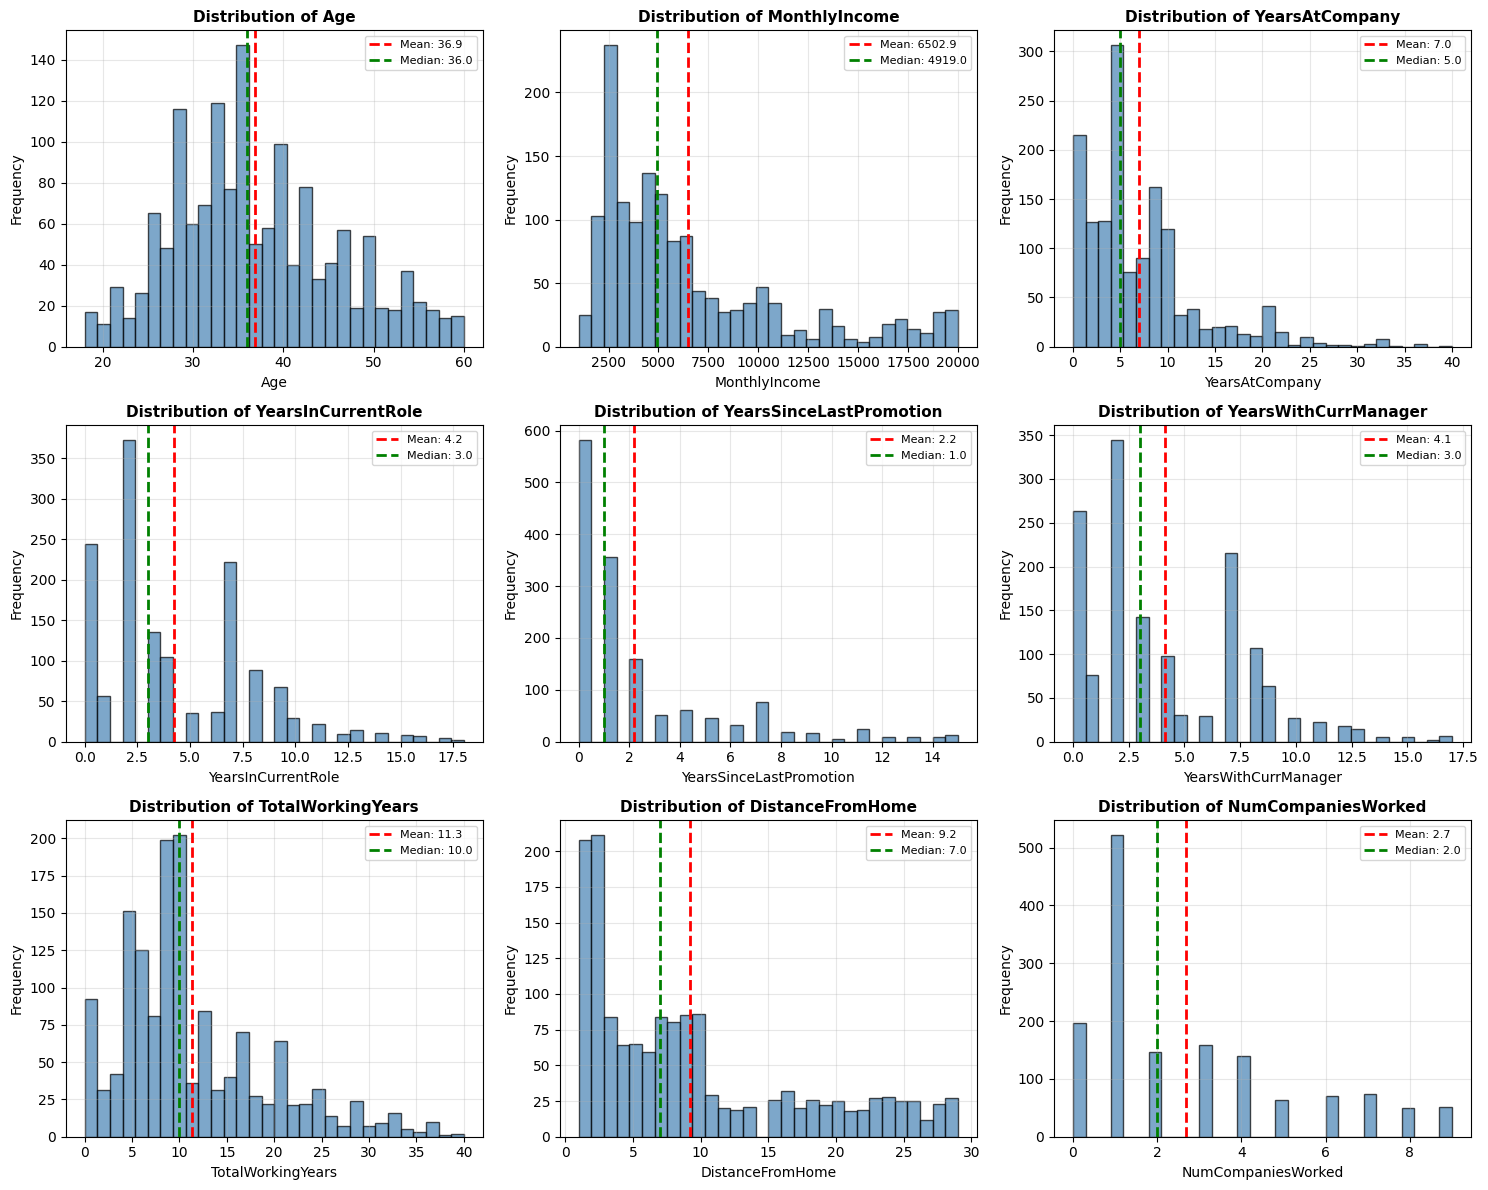


Creating distribution comparison by Attrition status...


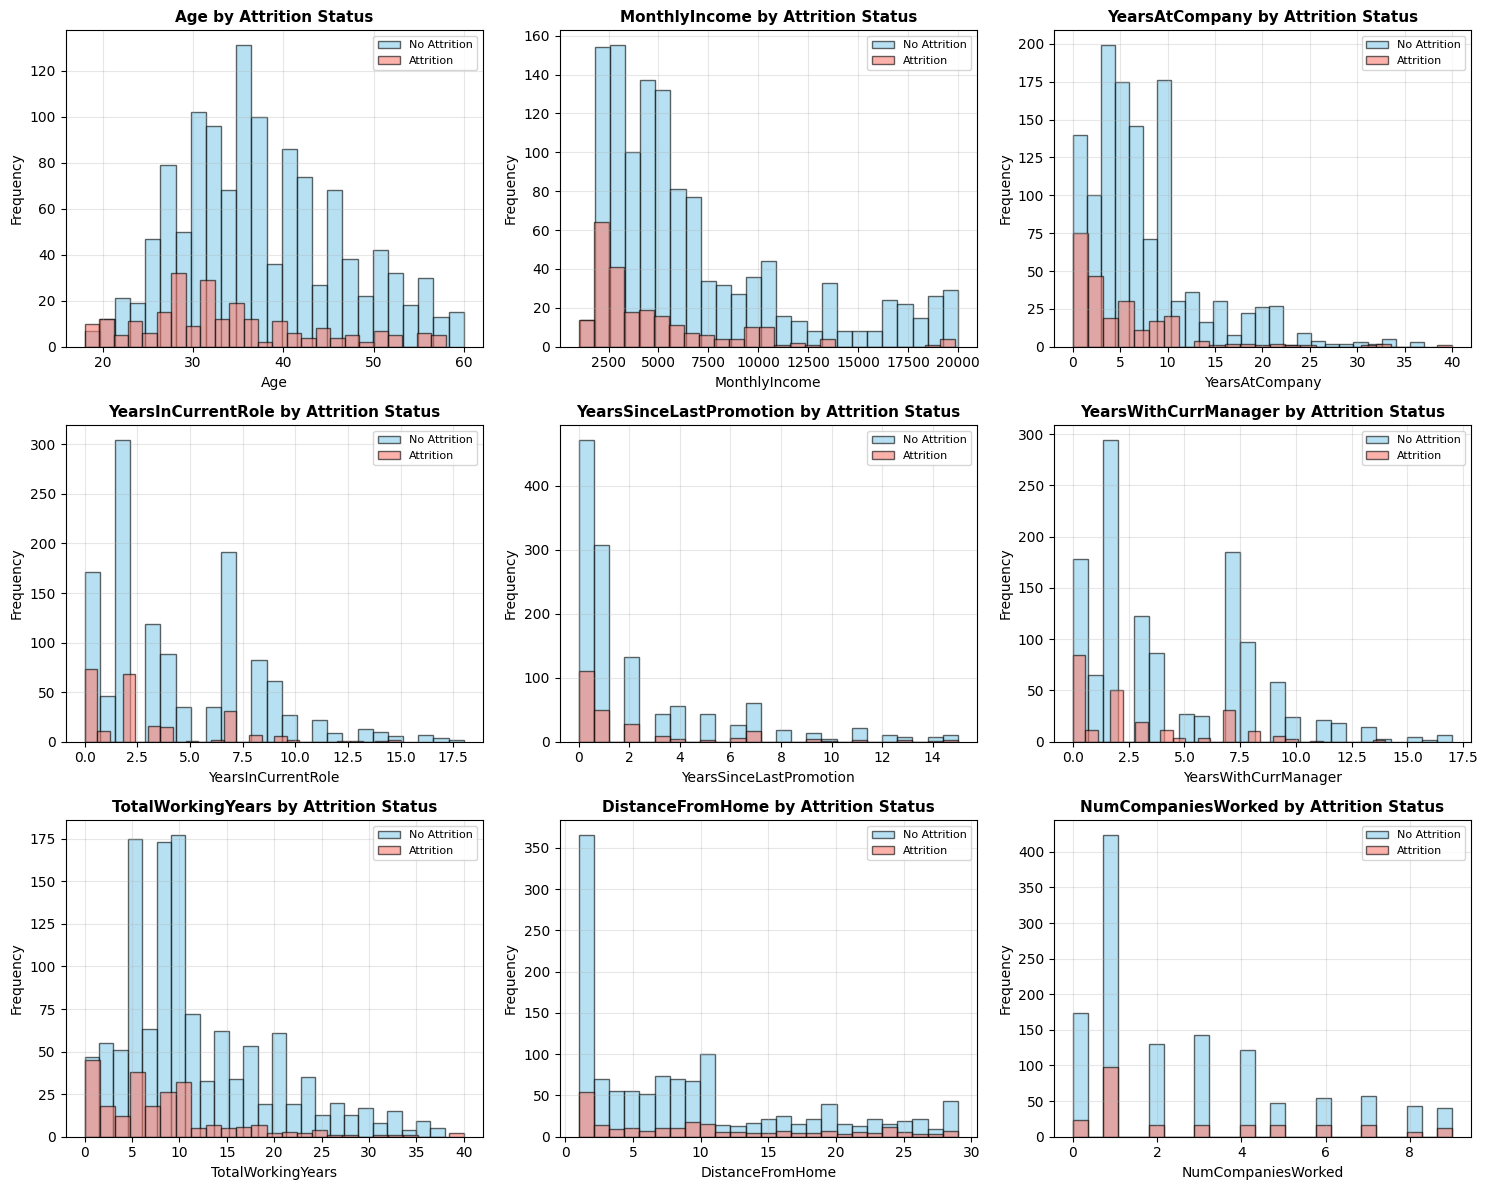

In [121]:
# Visualize the distribution of numerical features to understand
print("\n" + "=" * 60)
print(" FEATURE DISTRIBUTION ANALYSIS")
print("=" * 60)
# Select key numerical features for distribution analysis
numerical_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole',
                     'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears',
                     'DistanceFromHome', 'NumCompaniesWorked']

# Filter to only include features that exist in the dataset
numerical_features = [f for f in numerical_features if f in df_processed.columns]
print(f"\nAnalyzing distribution of {len(numerical_features)} key numerical features")
# Create distribution plots for numerical features
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_features > 1 else [axes]
for idx, feature in enumerate(numerical_features):
    ax = axes[idx]
    # Create histogram with KDE overlay
    ax.hist(df_processed[feature], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f'Distribution of {feature}', fontweight='bold', fontsize=11)
    ax.grid(True, alpha=0.3)

    # Add statistical annotations
    mean_val = df_processed[feature].mean()
    median_val = df_processed[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    ax.legend(fontsize=8)

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()



# Distribution comparison by Attrition status
print("\nCreating distribution comparison by Attrition status...")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_features > 1 else [axes]
for idx, feature in enumerate(numerical_features):
    ax = axes[idx]

    # Separate data by attrition status
    no_attrition = df_processed[df_processed['Attrition'] == 0][feature]
    yes_attrition = df_processed[df_processed['Attrition'] == 1][feature]

    # Create overlapping histograms
    ax.hist(no_attrition, bins=25, alpha=0.6, label='No Attrition', color='skyblue', edgecolor='black')
    ax.hist(yes_attrition, bins=25, alpha=0.6, label='Attrition', color='salmon', edgecolor='black')

    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f'{feature} by Attrition Status', fontweight='bold', fontsize=11)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')
plt.tight_layout()
plt.savefig('feature_distributions_by_attrition.png', dpi=300, bbox_inches='tight')
plt.show()


# Outlier Detection and Visualization
---
Identify and visualize outliers using statistical methods:
- Box plots for 9 key numerical features
- IQR method: outliers beyond Q1-1.5×IQR and Q3+1.5×IQR
- Calculate outlier counts and percentages
- Flag features with >5% outlier rate
- Visualization: Box plots grid + outlier percentage bar chart



OUTLIER DETECTION AND VISUALIZATION

Creating box plots for outlier visualization...


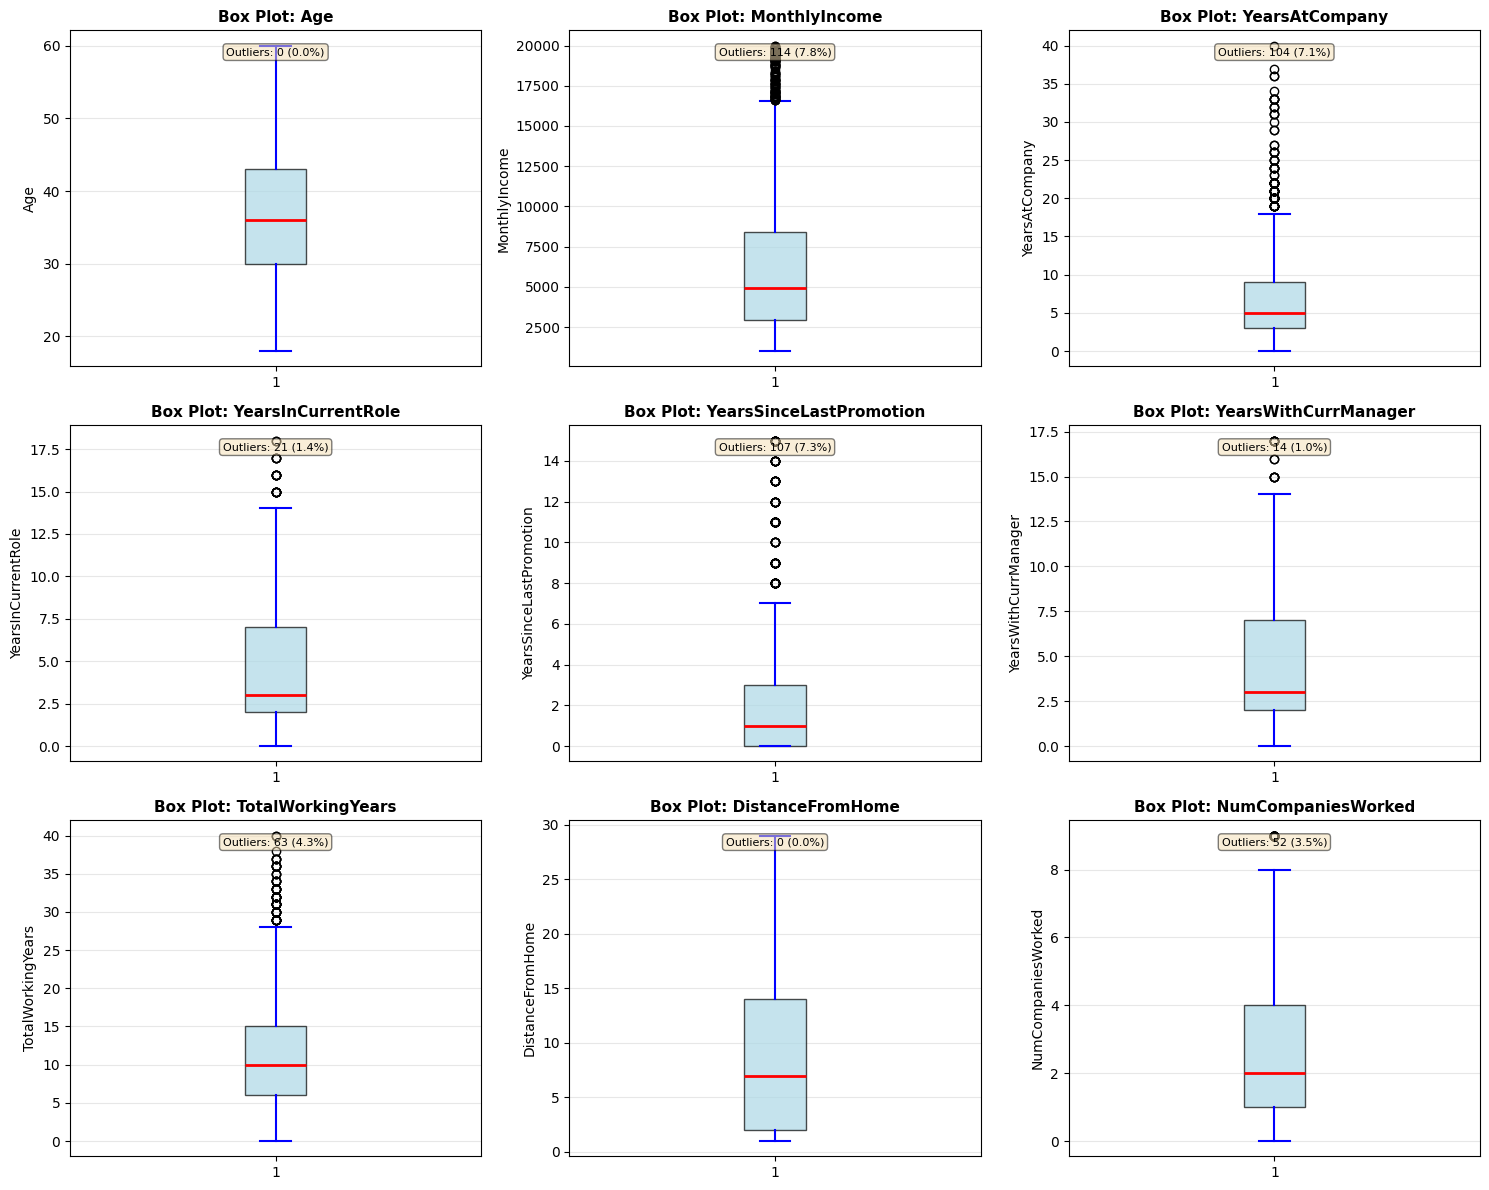


------------------------------------------------------------
OUTLIER SUMMARY (IQR Method)
------------------------------------------------------------
                Feature  N_Outliers  Outlier_Percentage
                    Age           0            0.000000
          MonthlyIncome         114            7.755102
         YearsAtCompany         104            7.074830
     YearsInCurrentRole          21            1.428571
YearsSinceLastPromotion         107            7.278912
   YearsWithCurrManager          14            0.952381
      TotalWorkingYears          63            4.285714
       DistanceFromHome           0            0.000000
     NumCompaniesWorked          52            3.537415

Features with >5% outliers:
  - MonthlyIncome: 114 outliers (7.8%)
  - YearsAtCompany: 104 outliers (7.1%)
  - YearsSinceLastPromotion: 107 outliers (7.3%)


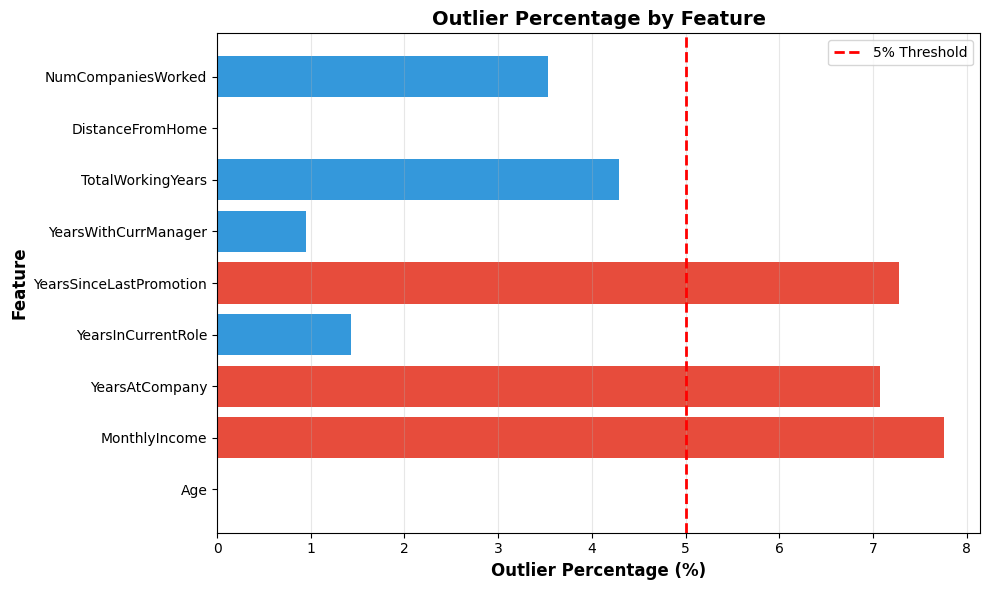

In [122]:
# Identify and visualize outliers using box plots and statistical methods
print("\n" + "=" * 60)
print("OUTLIER DETECTION AND VISUALIZATION")
print("=" * 60)
# Create box plots to visualize outliers
print("\nCreating box plots for outlier visualization...")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_features > 1 else [axes]
outlier_summary = []
for idx, feature in enumerate(numerical_features):
    ax = axes[idx]
    # Create box plot
    bp = ax.boxplot(df_processed[feature], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='blue', linewidth=1.5),
                    capprops=dict(color='blue', linewidth=1.5))

    ax.set_ylabel(feature, fontsize=10)
    ax.set_title(f'Box Plot: {feature}', fontweight='bold', fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')

    # Calculate outliers using IQR method
    Q1 = df_processed[feature].quantile(0.25)
    Q3 = df_processed[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df_processed[(df_processed[feature] < lower_bound) |
                           (df_processed[feature] > upper_bound)][feature]
    n_outliers = len(outliers)
    outlier_pct = (n_outliers / len(df_processed)) * 100

    # Add text annotation
    ax.text(0.5, 0.95, f'Outliers: {n_outliers} ({outlier_pct:.1f}%)',
            transform=ax.transAxes, ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
            fontsize=8)

    # Store summary
    outlier_summary.append({
        'Feature': feature,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'N_Outliers': n_outliers,
        'Outlier_Percentage': outlier_pct
    })

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')
plt.tight_layout()
plt.savefig('outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
# Print outlier summary
print("\n" + "-"*60)
print("OUTLIER SUMMARY (IQR Method)")
print("-"*60)
outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df[['Feature', 'N_Outliers', 'Outlier_Percentage']].to_string(index=False))

# Identify features with high outlier percentage
high_outlier_features = outlier_df[outlier_df['Outlier_Percentage'] > 5]
if not high_outlier_features.empty:
    print(f"\nFeatures with >5% outliers:")
    for _, row in high_outlier_features.iterrows():
        print(f"  - {row['Feature']}: {row['N_Outliers']} outliers ({row['Outlier_Percentage']:.1f}%)")
else:
    print("\nNo features have >5% outliers")

# Create a summary visualization showing outlier percentages
plt.figure(figsize=(10, 6))
colors_outlier = ['#e74c3c' if x > 5 else '#3498db' for x in outlier_df['Outlier_Percentage']]
plt.barh(outlier_df['Feature'], outlier_df['Outlier_Percentage'], color=colors_outlier)
plt.xlabel('Outlier Percentage (%)', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Outlier Percentage by Feature', fontsize=14, fontweight='bold')
plt.axvline(x=5, color='red', linestyle='--', linewidth=2, label='5% Threshold')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('outlier_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# TRAIN-TEST Split
---
Split dataset into training (80%) and testing (20%) sets and stratifying the samples. Stratification maintains 16.1% attrition rate in both sets, preventing distribution bias.

Training set: 1,176 samples. Test set: 294 samples

In [123]:
# Split data into training and testing sets and stratifying the samples
print("\n" + "=" * 60)
print("TRAIN-TEST SPLIT")
print("=" * 60)

# Separate features (X) and target variable (y)
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

# Stratified train-test split (80-20 split with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% for testing
    random_state=42,      # For reproducibility
    stratify=y            # Maintain class distribution
)

print(f"Training set: {len(y_train)} samples")
print(f"Test set: {len(y_test)} samples")
print(f"Train attrition rate: {y_train.mean()*100:.2f}%")
print(f"Test attrition rate: {y_test.mean()*100:.2f}%")


TRAIN-TEST SPLIT
Training set: 1176 samples
Test set: 294 samples
Train attrition rate: 16.16%
Test attrition rate: 15.99%


# Feature Scaling

In [124]:
# Standardize features using StandardScaler (mean=0, std=1)
print("\n" + "=" * 60)
print("FEATURE SCALING")
print("=" * 60)

# Initialize and fit scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)        # Transform test data using training statistics
print("Scaling complete using StandardScaler")


FEATURE SCALING
Scaling complete using StandardScaler


# Machine Learning Models
---
Train and evaluate 5 classification models: Logistic Regression, SVM, Decision Tree,Random Forest, and XGBoost. Each model uses balanced class weights for the 5.2:1 imbalance.

Generate comprehensive performance metrics (accuracy, precision, recall,F1-score, ROC-AUC), confusion matrices, ROC curves, and feature importance analysis.

Compare results to select optimal model based on recall (primary criterion).

# Logistic Regression


MODEL 1: LOGISTIC REGRESSION
Model training complete

LOGISTIC REGRESSION PERFORMANCE

Accuracy:  0.7449
Precision: 0.3627 (Of predicted 'Yes', % correct)
Recall:    0.7872 (Of actual 'Yes', % caught)
F1-Score:  0.4966 (Primary metric)

------------------------------------------------------------
DETAILED CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

No Attrition       0.95      0.74      0.83       247
   Attrition       0.36      0.79      0.50        47

    accuracy                           0.74       294
   macro avg       0.66      0.76      0.66       294
weighted avg       0.85      0.74      0.78       294


------------------------------------------------------------
CONFUSION MATRIX
------------------------------------------------------------
                 Predicted
                 No      Yes
Actual   No     182     65
         Yes    10      37

True Negatives:  182 (Correctly

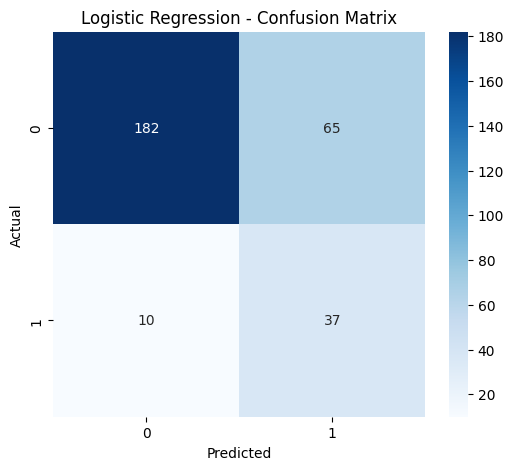

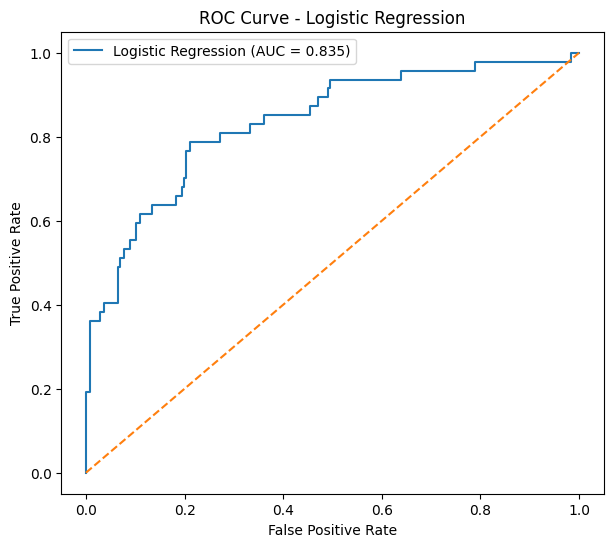

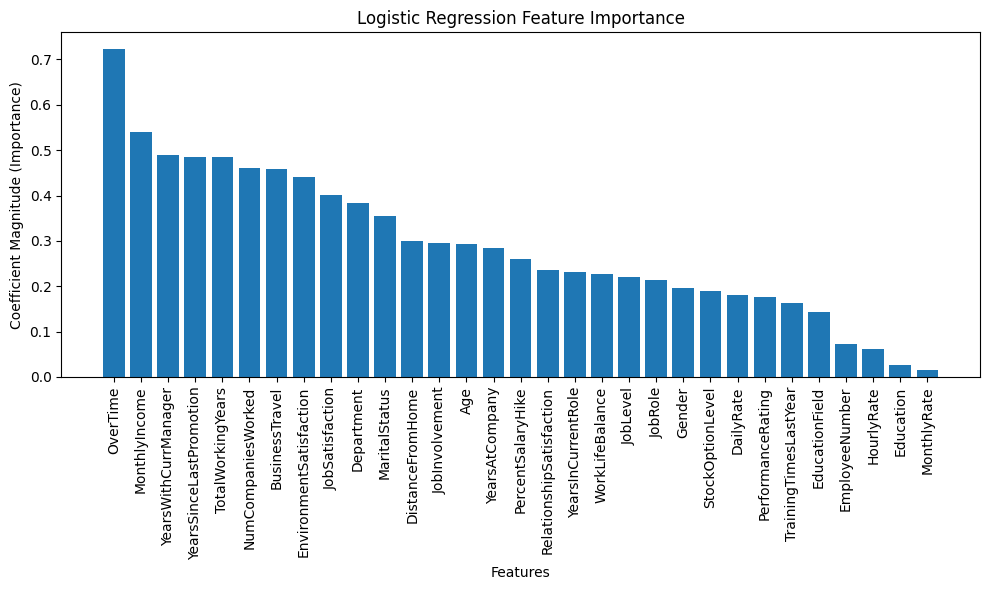


Top 10 Most Important Features:
1. OverTime                       0.7237
2. MonthlyIncome                  0.5410
3. YearsWithCurrManager           0.4887
4. YearsSinceLastPromotion        0.4849
5. TotalWorkingYears              0.4846
6. NumCompaniesWorked             0.4617
7. BusinessTravel                 0.4577
8. EnvironmentSatisfaction        0.4420
9. JobSatisfaction                0.4002
10. Department                     0.3840


In [125]:
# Train and evaluate Logistic Regression model

print("\n" + "=" * 60)
print("MODEL 1: LOGISTIC REGRESSION")
print("=" * 60)

# Initialize Logistic Regression with balanced class weights
# class_weight='balanced' automatically adjusts weights inversely proportional to class frequencies
lr_model = LogisticRegression(
    random_state=42,            # For reproducibility
    max_iter=1000,              # Maximum iterations for convergence
    class_weight='balanced'     # Handle class imbalance
)
lr_model.fit(X_train_scaled, y_train)
print("Model training complete")
# Generate predictions on test set
y_pred_lr = lr_model.predict(X_test_scaled)                    # Binary predictions
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probability scores
# Calculate performance metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Display performance metrics
print("\n" + "="*60)
print("LOGISTIC REGRESSION PERFORMANCE")
print("="*60)
print(f"\nAccuracy:  {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f} (Of predicted 'Yes', % correct)")
print(f"Recall:    {recall_lr:.4f} (Of actual 'Yes', % caught)")
print(f"F1-Score:  {f1_lr:.4f} (Primary metric)")

# Display detailed classification report
print("\n" + "-"*60)
print("DETAILED CLASSIFICATION REPORT")
print("-"*60)
print(classification_report(y_test, y_pred_lr,
                           target_names=['No Attrition', 'Attrition']))

# Generate and display confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\n" + "-"*60)
print("CONFUSION MATRIX")
print("-"*60)
print(f"                 Predicted")
print(f"                 No      Yes")
print(f"Actual   No     {cm_lr[0,0]:<8}{cm_lr[0,1]}")
print(f"         Yes    {cm_lr[1,0]:<8}{cm_lr[1,1]}")

print(f"\nTrue Negatives:  {cm_lr[0,0]} (Correctly predicted 'No')")
print(f"False Positives: {cm_lr[0,1]} (Predicted 'Yes', actually 'No')")
print(f"False Negatives: {cm_lr[1,0]} (Predicted 'No', actually 'Yes')")
print(f"True Positives:  {cm_lr[1,1]} (Correctly predicted 'Yes')")

# Business interpretation: How many actual attritions were caught?
total_attritions_lr = cm_lr[1,0] + cm_lr[1,1]
caught_attritions_lr = cm_lr[1,1]
missed_attritions_lr = cm_lr[1,0]

print("\n" + "="*60)
print("BUSINESS INTERPRETATION")
print("="*60)
print(f"\nOut of {total_attritions_lr} employees who left:")
print(f"   Caught: {caught_attritions_lr} ({caught_attritions_lr/total_attritions_lr*100:.1f}%)")
print(f"   Missed: {missed_attritions_lr} ({missed_attritions_lr/total_attritions_lr*100:.1f}%)")

# Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt='g')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('lr_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot ROC Curve to evaluate model discrimination ability
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.3f})'.format(roc_auc_lr))
plt.plot([0,1], [0,1], linestyle='--')  # Diagonal line for random classifier
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig('lr_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Extract and visualize feature importance
# For logistic regression, feature importance is based on coefficient magnitude
feature_names = X.columns
coefficients = lr_model.coef_[0]
importances_lr = np.abs(coefficients)
indices_lr = np.argsort(importances_lr)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_lr)), importances_lr[indices_lr])
plt.xticks(range(len(importances_lr)), feature_names[indices_lr], rotation=90)
plt.ylabel("Coefficient Magnitude (Importance)")
plt.xlabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.tight_layout()
plt.savefig('lr_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 10 Most Important Features:")
print("="*50)
for i in range(min(10, len(indices_lr))):
    idx = indices_lr[i]
    print(f"{i+1}. {feature_names[idx]:<30} {importances_lr[idx]:.4f}")

# SVM


MODEL 2: SUPPORT VECTOR MACHINE (SVM)

Training SVM model...
SVM training complete

SVM PERFORMANCE

Accuracy:  0.8129
Precision: 0.4412 (Of predicted 'Yes', % correct)
Recall:    0.6383 (Of actual 'Yes', % caught)
F1-Score:  0.5217 (Primary metric)

------------------------------------------------------------
DETAILED CLASSIFICATION REPORT (SVM)
------------------------------------------------------------
              precision    recall  f1-score   support

No Attrition       0.92      0.85      0.88       247
   Attrition       0.44      0.64      0.52        47

    accuracy                           0.81       294
   macro avg       0.68      0.74      0.70       294
weighted avg       0.85      0.81      0.83       294


------------------------------------------------------------
CONFUSION MATRIX (SVM)
------------------------------------------------------------
                 Predicted
                 No      Yes
Actual   No     209     38
         Yes    17      30

True 

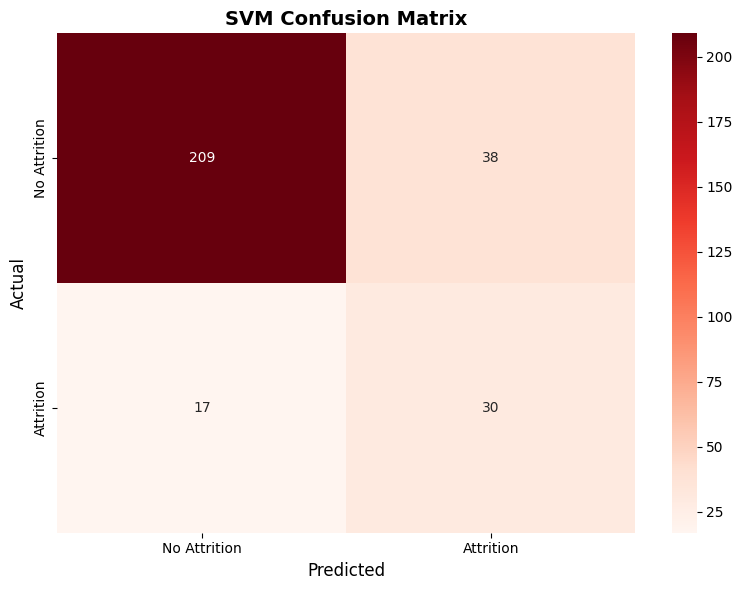

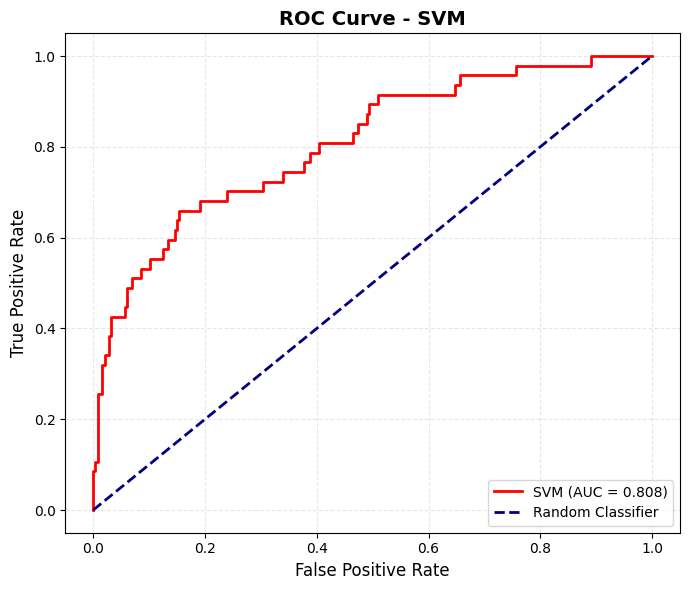

In [126]:
# Train and evaluate SVM model with RBF kernel
print("\n" + "=" * 60)
print("MODEL 2: SUPPORT VECTOR MACHINE (SVM)")
print("=" * 60)

# Initialize SVM with RBF kernel and balanced class weights
svm_model = SVC(
    kernel='rbf',               # Radial Basis Function kernel for non-linear patterns
    C=1.0,                      # Regularization parameter
    gamma='scale',              # Kernel coefficient (auto-scaled)
    class_weight='balanced',    # Handle class imbalance
    probability=True,           # Enable probability estimates for ROC curve
    random_state=42             # For reproducibility
)

print("\nTraining SVM model...")
svm_model.fit(X_train_scaled, y_train)
print("SVM training complete")

# Generate predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("\n" + "="*60)
print("SVM PERFORMANCE")
print("="*60)
print(f"\nAccuracy:  {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f} (Of predicted 'Yes', % correct)")
print(f"Recall:    {recall_svm:.4f} (Of actual 'Yes', % caught)")
print(f"F1-Score:  {f1_svm:.4f} (Primary metric)")

print("\n" + "-"*60)
print("DETAILED CLASSIFICATION REPORT (SVM)")
print("-"*60)
print(classification_report(y_test, y_pred_svm,
                            target_names=['No Attrition', 'Attrition']))

# Generate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\n" + "-"*60)
print("CONFUSION MATRIX (SVM)")
print("-"*60)
print(f"                 Predicted")
print(f"                 No      Yes")
print(f"Actual   No     {cm_svm[0,0]:<8}{cm_svm[0,1]}")
print(f"         Yes    {cm_svm[1,0]:<8}{cm_svm[1,1]}")

print(f"\nTrue Negatives:  {cm_svm[0,0]} (Correctly predicted 'No')")
print(f"False Positives: {cm_svm[0,1]} (Predicted 'Yes', actually 'No')")
print(f"False Negatives: {cm_svm[1,0]} (Predicted 'No', actually 'Yes')")
print(f"True Positives:  {cm_svm[1,1]} (Correctly predicted 'Yes')")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title('SVM Confusion Matrix', fontweight='bold', fontsize=14)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.savefig('svm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(7, 6))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2,
         label=f'SVM (AUC = {roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - SVM', fontweight='bold', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('svm_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()


# Random Forest



MODEL 3: RANDOM FOREST

Training Random Forest model...
Random Forest training complete

RANDOM FOREST PERFORMANCE

Accuracy:  0.8401
Precision: 0.5000 (Of predicted 'Yes', % correct)
Recall:    0.0851 (Of actual 'Yes', % caught)
F1-Score:  0.1455 (Primary metric)

------------------------------------------------------------
DETAILED CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

No Attrition       0.85      0.98      0.91       247
   Attrition       0.50      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.53       294
weighted avg       0.79      0.84      0.79       294


------------------------------------------------------------
CONFUSION MATRIX
------------------------------------------------------------
                 Predicted
                 No      Yes
Actual   No     243     4
         Yes    43      4

True

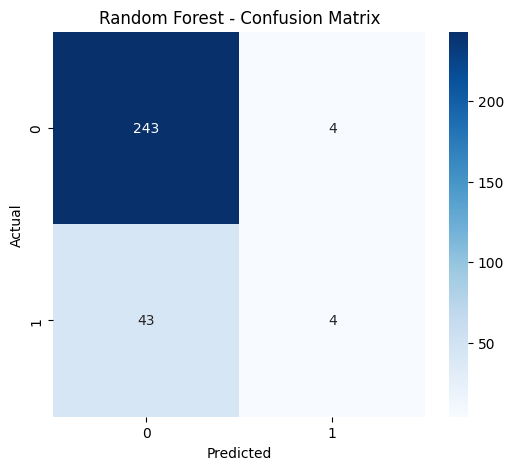

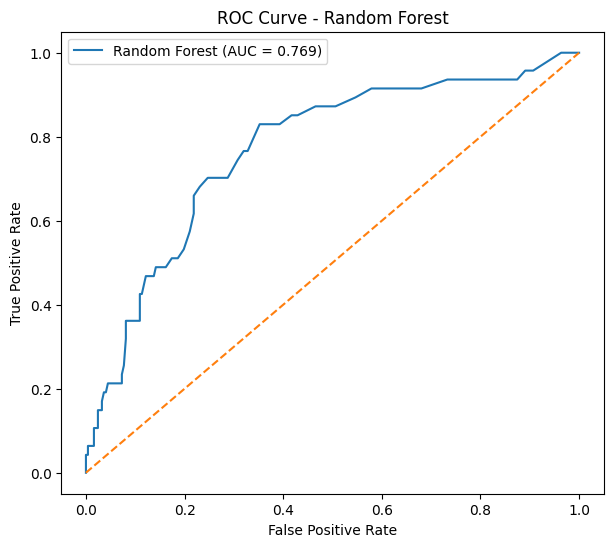

/tmp/ipython-input-1324580499.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df.head(15), palette="viridis")


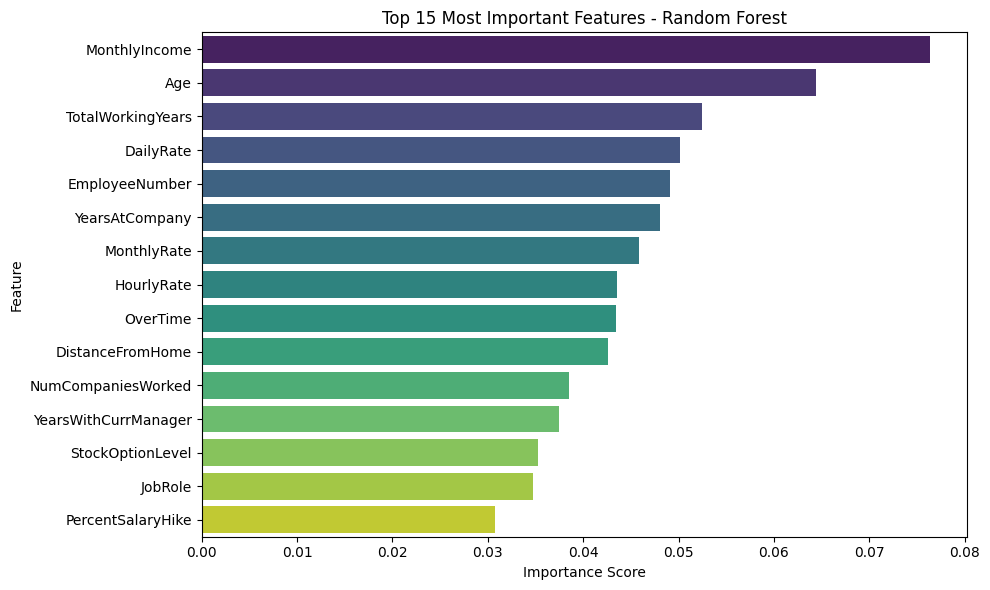

In [127]:

# Train and evaluate Random Forest classifier
print("\n" + "=" * 60)
print("MODEL 3: RANDOM FOREST")
print("=" * 60)
# Initialize Random Forest with balanced class weights
rf_model = RandomForestClassifier(
    n_estimators=200,           # Number of trees in the forest
    max_depth=None,             # Nodes are expanded until all leaves are pure
    class_weight='balanced',    # Handle class imbalance
    random_state=42             # For reproducibility
)
print("\nTraining Random Forest model...")
rf_model.fit(X_train_scaled, y_train)
print("Random Forest training complete")

# Generate predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\n" + "="*60)
print("RANDOM FOREST PERFORMANCE")
print("="*60)
print(f"\nAccuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f} (Of predicted 'Yes', % correct)")
print(f"Recall:    {recall_rf:.4f} (Of actual 'Yes', % caught)")
print(f"F1-Score:  {f1_rf:.4f} (Primary metric)")

print("\n" + "-"*60)
print("DETAILED CLASSIFICATION REPORT")
print("-"*60)
print(classification_report(y_test, y_pred_rf,
                           target_names=['No Attrition', 'Attrition']))

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\n" + "-"*60)
print("CONFUSION MATRIX")
print("-"*60)
print(f"                 Predicted")
print(f"                 No      Yes")
print(f"Actual   No     {cm_rf[0,0]:<8}{cm_rf[0,1]}")
print(f"         Yes    {cm_rf[1,0]:<8}{cm_rf[1,1]}")

print(f"\nTrue Negatives:  {cm_rf[0,0]} (Correctly predicted 'No')")
print(f"False Positives: {cm_rf[0,1]} (Predicted 'Yes', actually 'No')")
print(f"False Negatives: {cm_rf[1,0]} (Predicted 'No', actually 'Yes')")
print(f"True Positives:  {cm_rf[1,1]} (Correctly predicted 'Yes')")

# Business interpretation
total_attritions_rf = cm_rf[1,0] + cm_rf[1,1]
caught_attritions_rf = cm_rf[1,1]
missed_attritions_rf = cm_rf[1,0]

print("\n" + "="*60)
print("BUSINESS INTERPRETATION")
print("="*60)
print(f"\nOut of {total_attritions_rf} employees who left:")
print(f"   Caught: {caught_attritions_rf} ({caught_attritions_rf/total_attritions_rf*100:.1f}%)")
print(f"   Missed: {missed_attritions_rf} ({missed_attritions_rf/total_attritions_rf*100:.1f}%)")

# Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt='g')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.3f})'.format(roc_auc_rf))
plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig('rf_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Extract and visualize feature importance

importances_rf = rf_model.feature_importances_

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_rf
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df.head(15), palette="viridis")
plt.title("Top 15 Most Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


# Decision Tree


MODEL 4: DECISION TREE

Training Decision Tree model...
Decision Tree training complete

DECISION TREE PERFORMANCE

Accuracy:  0.7687
Precision: 0.3478 (Of predicted 'Yes', % correct)
Recall:    0.5106 (Of actual 'Yes', % caught)
F1-Score:  0.4138 (Primary metric)

------------------------------------------------------------
DETAILED CLASSIFICATION REPORT (Decision Tree)
------------------------------------------------------------
              precision    recall  f1-score   support

No Attrition       0.90      0.82      0.86       247
   Attrition       0.35      0.51      0.41        47

    accuracy                           0.77       294
   macro avg       0.62      0.66      0.63       294
weighted avg       0.81      0.77      0.79       294


------------------------------------------------------------
CONFUSION MATRIX (Decision Tree)
------------------------------------------------------------
                 Predicted
                 No      Yes
Actual   No     202     4

<Figure size 500x500 with 0 Axes>

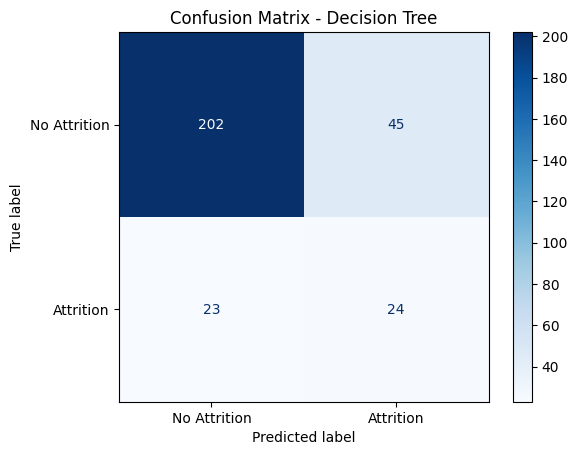

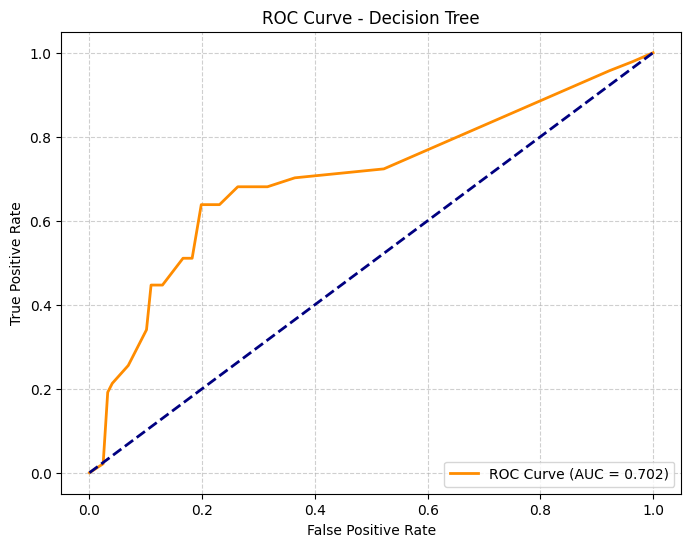

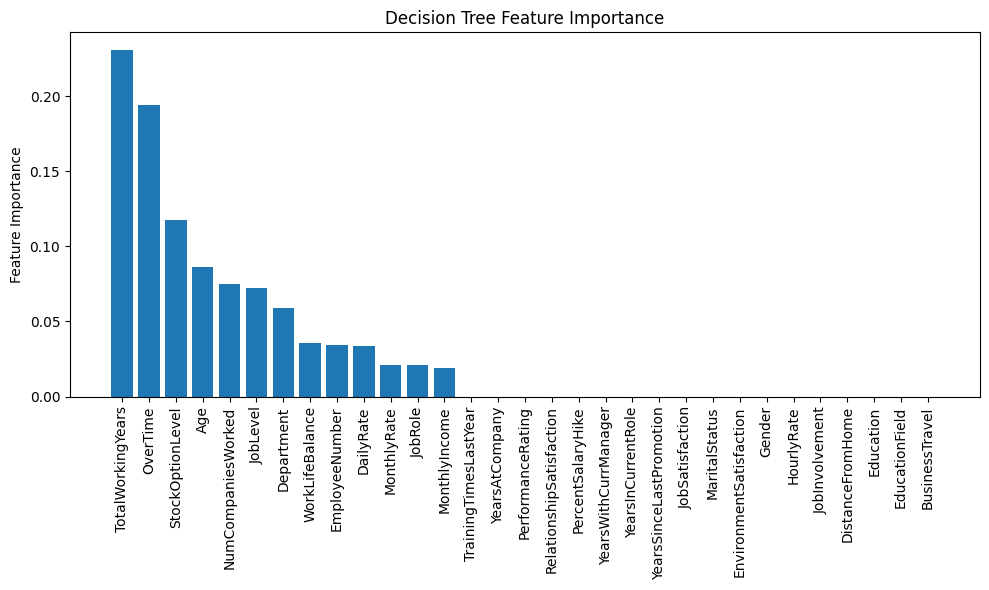

In [128]:
# Train and evaluate Decision Tree classifier
print("\n" + "=" * 60)
print("MODEL 4: DECISION TREE")
print("=" * 60)

# Initialize Decision Tree with constraints to prevent overfitting
dt_model = DecisionTreeClassifier(
    random_state=200,           # For reproducibility
    class_weight="balanced",    # Handle class imbalance
    max_depth=5,                # Limit tree depth to prevent overfitting
    min_samples_leaf=20         # Minimum samples required at leaf node
)

print("\nTraining Decision Tree model...")
dt_model.fit(X_train, y_train)  # Note: Using unscaled data as trees are scale-invariant
print("Decision Tree training complete")

# Generate predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("\n" + "="*60)
print("DECISION TREE PERFORMANCE")
print("="*60)
print(f"\nAccuracy:  {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f} (Of predicted 'Yes', % correct)")
print(f"Recall:    {recall_dt:.4f} (Of actual 'Yes', % caught)")
print(f"F1-Score:  {f1_dt:.4f} (Primary metric)")

print("\n" + "-"*60)
print("DETAILED CLASSIFICATION REPORT (Decision Tree)")
print("-"*60)
print(classification_report(y_test, y_pred_dt,
                            target_names=['No Attrition', 'Attrition']))

# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\n" + "-"*60)
print("CONFUSION MATRIX (Decision Tree)")
print("-"*60)
print(f"                 Predicted")
print(f"                 No      Yes")
print(f"Actual   No     {cm_dt[0,0]:<8}{cm_dt[0,1]}")
print(f"         Yes    {cm_dt[1,0]:<8}{cm_dt[1,1]}")

print(f"\nTrue Negatives:  {cm_dt[0,0]} (Correctly predicted 'No')")
print(f"False Positives: {cm_dt[0,1]} (Predicted 'Yes', actually 'No')")
print(f"False Negatives: {cm_dt[1,0]} (Predicted 'No', actually 'Yes')")
print(f"True Positives:  {cm_dt[1,1]} (Correctly predicted 'Yes')")

# Business interpretation
total_attritions_dt = cm_dt[1,0] + cm_dt[1,1]
caught_attritions_dt = cm_dt[1,1]
missed_attritions_dt = cm_dt[1,0]

print("\n" + "="*60)
print("BUSINESS INTERPRETATION")
print("="*60)
print(f"\nOut of {total_attritions_dt} employees who left:")
print(f"   Caught: {caught_attritions_dt} ({caught_attritions_dt/total_attritions_dt*100:.1f}%)")
print(f"   Missed: {missed_attritions_dt} ({missed_attritions_dt/total_attritions_dt*100:.1f}%)")

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,
                              display_labels=["No Attrition", "Attrition"])
plt.figure(figsize=(5, 5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Decision Tree")
plt.savefig('dt_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc_dt:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('dt_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Extract and visualize feature importance
importances_dt = dt_model.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_dt)), importances_dt[indices_dt])
plt.xticks(range(len(importances_dt)), feature_names[indices_dt], rotation=90)
plt.ylabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.tight_layout()
plt.savefig('dt_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


# XGBOOST


MODEL 5: XGBOOST

Training XGBoost model...
XGBoost training complete

XGBOOST PERFORMANCE

Accuracy:  0.8537
Precision: 0.5714 (Of predicted 'Yes', % correct)
Recall:    0.3404 (Of actual 'Yes', % caught) - CRITICAL
F1-Score:  0.4267 (Primary metric)

------------------------------------------------------------
DETAILED CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

No Attrition       0.88      0.95      0.92       247
   Attrition       0.57      0.34      0.43        47

    accuracy                           0.85       294
   macro avg       0.73      0.65      0.67       294
weighted avg       0.83      0.85      0.84       294


------------------------------------------------------------
CONFUSION MATRIX
------------------------------------------------------------
                 Predicted
                 No      Yes
Actual   No     235     12
         Yes    31      16

True Negatives:

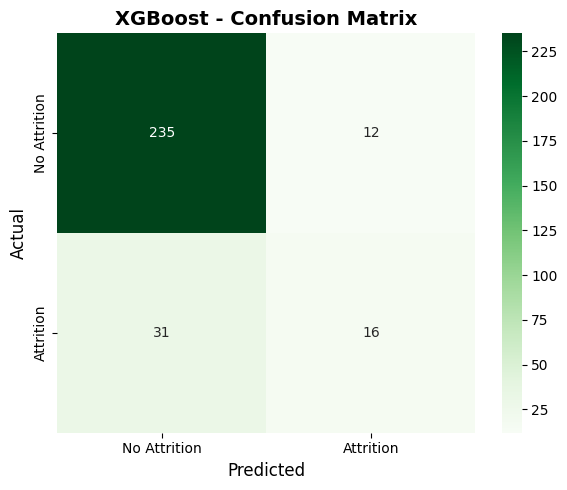

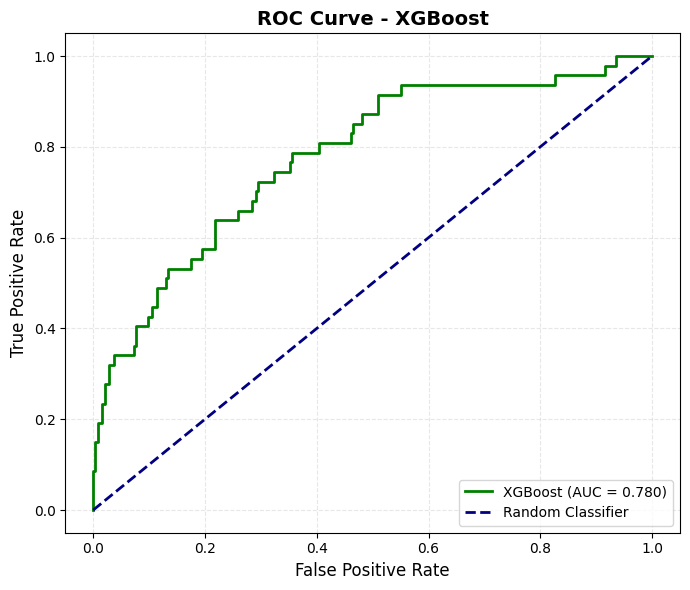

/tmp/ipython-input-4266113021.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='FeatureName', data=top_features_xgb, palette='viridis')


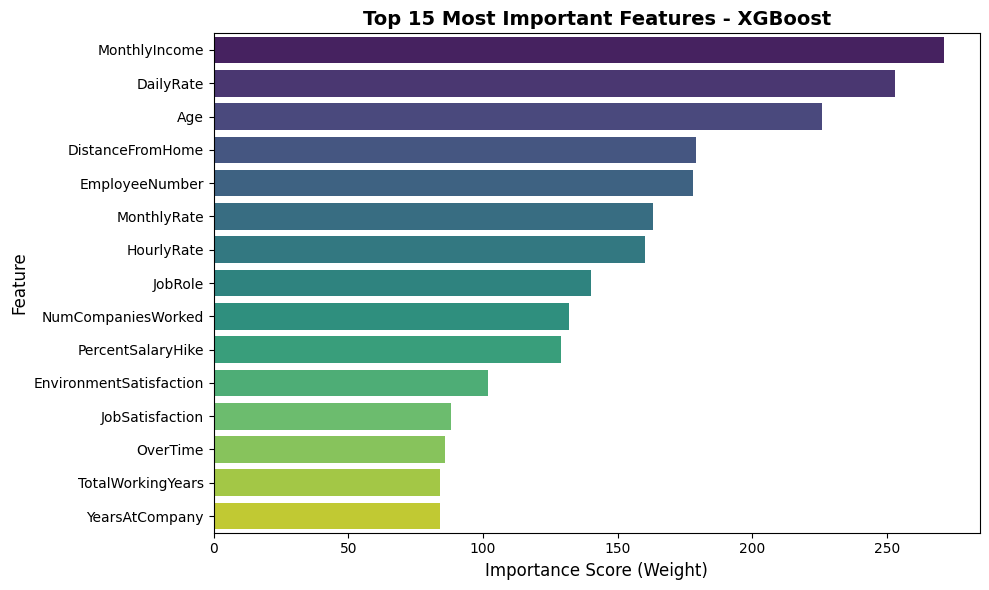


Top 10 Most Important Features:
1. MonthlyIncome                  271
2. DailyRate                      253
3. Age                            226
4. DistanceFromHome               179
5. EmployeeNumber                 178
6. MonthlyRate                    163
7. HourlyRate                     160
8. JobRole                        140
9. NumCompaniesWorked             132
10. PercentSalaryHike              129


In [129]:
# Train and evaluate XGBoost model
print("\n" + "=" * 60)
print("MODEL 5: XGBOOST")
print("=" * 60)

# Prepare data in XGBoost's DMatrix format for efficiency
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Calculate scale_pos_weight for handling class imbalance
# This parameter balances positive and negative classes
neg_count = sum(y_train == 0)
pos_count = sum(y_train == 1)
ratio = neg_count / pos_count

# Configure XGBoost parameters
params = {
    'objective': 'binary:logistic',     # Binary classification
    'eta': 0.1,                         # Learning rate (step size shrinkage)
    'max_depth': 6,                     # Maximum depth of trees
    'eval_metric': 'logloss',           # Evaluation metric
    'seed': 42,                         # For reproducibility
    'scale_pos_weight': ratio           # Balance class weights
}

num_rounds = 100  # Number of boosting rounds
print("\nTraining XGBoost model...")
xgb_model = xgb.train(params, dtrain, num_rounds)
print("XGBoost training complete")

# Generate predictions
pred = xgb_model.predict(dtest)
pred_binary = (pred > 0.5).astype(int)  # Convert probabilities to binary predictions
y_pred_xgb = pred_binary
y_pred_proba_xgb = pred

# Calculate performance metrics
accuracy_xgb = accuracy_score(y_test, pred_binary)
precision_xgb = precision_score(y_test, pred_binary)
recall_xgb = recall_score(y_test, pred_binary)
f1_xgb = f1_score(y_test, pred_binary)

# Display performance metrics
print("\n" + "="*60)
print("XGBOOST PERFORMANCE")
print("="*60)
print(f"\nAccuracy:  {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f} (Of predicted 'Yes', % correct)")
print(f"Recall:    {recall_xgb:.4f} (Of actual 'Yes', % caught) - CRITICAL")
print(f"F1-Score:  {f1_xgb:.4f} (Primary metric)")

# Display detailed classification report
print("\n" + "-"*60)
print("DETAILED CLASSIFICATION REPORT")
print("-"*60)
print(classification_report(y_test, pred_binary,
                           target_names=['No Attrition', 'Attrition']))

# Generate confusion matrix
cm_xgb = confusion_matrix(y_test, pred_binary)
print("\n" + "-"*60)
print("CONFUSION MATRIX")
print("-"*60)
print(f"                 Predicted")
print(f"                 No      Yes")
print(f"Actual   No     {cm_xgb[0,0]:<8}{cm_xgb[0,1]}")
print(f"         Yes    {cm_xgb[1,0]:<8}{cm_xgb[1,1]}")

print(f"\nTrue Negatives:  {cm_xgb[0,0]} (Correctly predicted 'No')")
print(f"False Positives: {cm_xgb[0,1]} (Predicted 'Yes', actually 'No')")
print(f"False Negatives: {cm_xgb[1,0]} (Predicted 'No', actually 'Yes') - CRITICAL MISS")
print(f"True Positives:  {cm_xgb[1,1]} (Correctly predicted 'Yes') - SUCCESS")

# Business interpretation
total_attritions_xgb = cm_xgb[1,0] + cm_xgb[1,1]
caught_attritions_xgb = cm_xgb[1,1]
missed_attritions_xgb = cm_xgb[1,0]

print("\n" + "="*60)
print("BUSINESS INTERPRETATION")
print("="*60)
print(f"\nOut of {total_attritions_xgb} employees who left:")
print(f"   Caught: {caught_attritions_xgb} ({caught_attritions_xgb/total_attritions_xgb*100:.1f}%)")
print(f"   Missed: {missed_attritions_xgb} ({missed_attritions_xgb/total_attritions_xgb*100:.1f}%)")

# Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, cmap="Greens", fmt='g',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title("XGBoost - Confusion Matrix", fontweight='bold', fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.tight_layout()
plt.savefig('xgb_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(7,6))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2,
         label='XGBoost (AUC = {:.3f})'.format(roc_auc_xgb))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.title("ROC Curve - XGBoost", fontweight='bold', fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('xgb_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Extract and visualize feature importance
# XGBoost provides importance based on weight (number of times feature is used)
importance_dict = xgb_model.get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': [f'f{i}' for i in range(len(feature_names))],
    'FeatureName': feature_names,
    'Importance': [importance_dict.get(f'f{i}', 0) for i in range(len(feature_names))]
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
top_features_xgb = importance_df.head(15)
sns.barplot(x='Importance', y='FeatureName', data=top_features_xgb, palette='viridis')
plt.title("Top 15 Most Important Features - XGBoost", fontweight='bold', fontsize=14)
plt.xlabel("Importance Score (Weight)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.savefig('xgb_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 10 Most Important Features:")
print("="*50)
for idx, row in importance_df.head(10).iterrows():
    print(f"{list(importance_df.head(10).index).index(idx)+1}. {row['FeatureName']:<30} {row['Importance']:.0f}")

# Model Comparision and Visualization
---
Comprehensive comparison of all 5 models across performance metrics. Generate
comparison dataframe with accuracy, precision, recall, F1-score, and ROC-AUC.

Created visualizations: metric bar charts , detailed horizontal bars ,
combined ROC curves, line graph trends, and confusion matrix grid.
Identified best performers and highlight recall as the critical metric for attrition.



MODEL COMPARISON SUMMARY

               Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.744898   0.362745 0.787234  0.496644 0.835214
                SVM  0.812925   0.441176 0.638298  0.521739 0.808080
      Random Forest  0.840136   0.500000 0.085106  0.145455 0.768671
      Decision Tree  0.768707   0.347826 0.510638  0.413793 0.702386
            XGBoost  0.853741   0.571429 0.340426  0.426667 0.779568


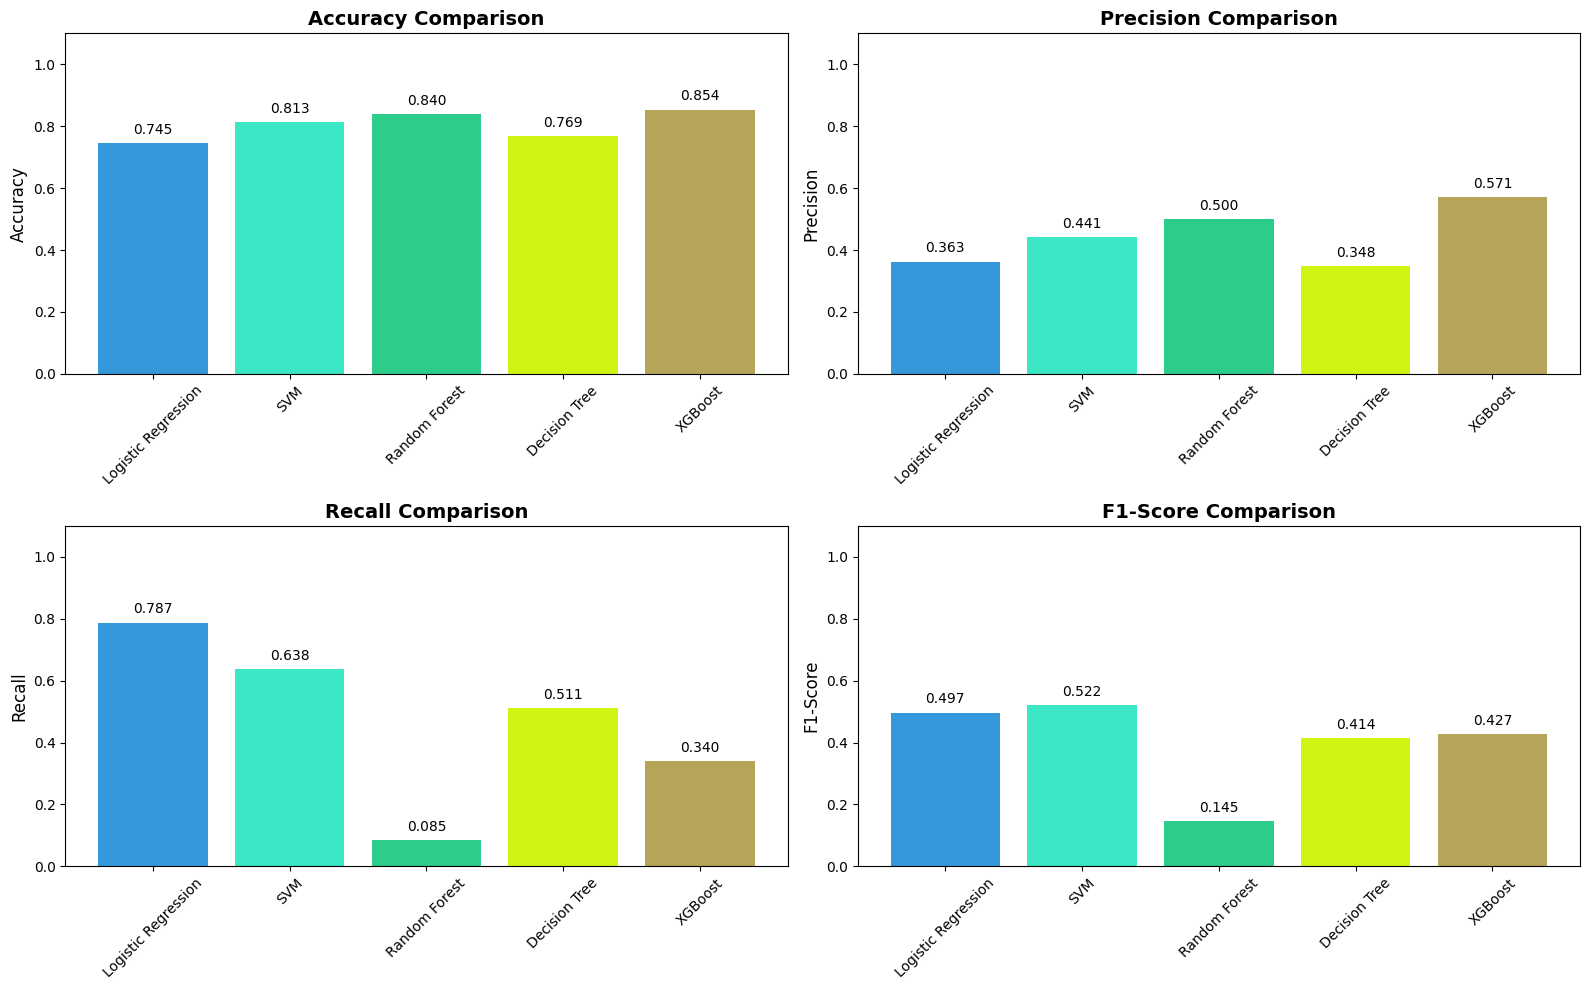

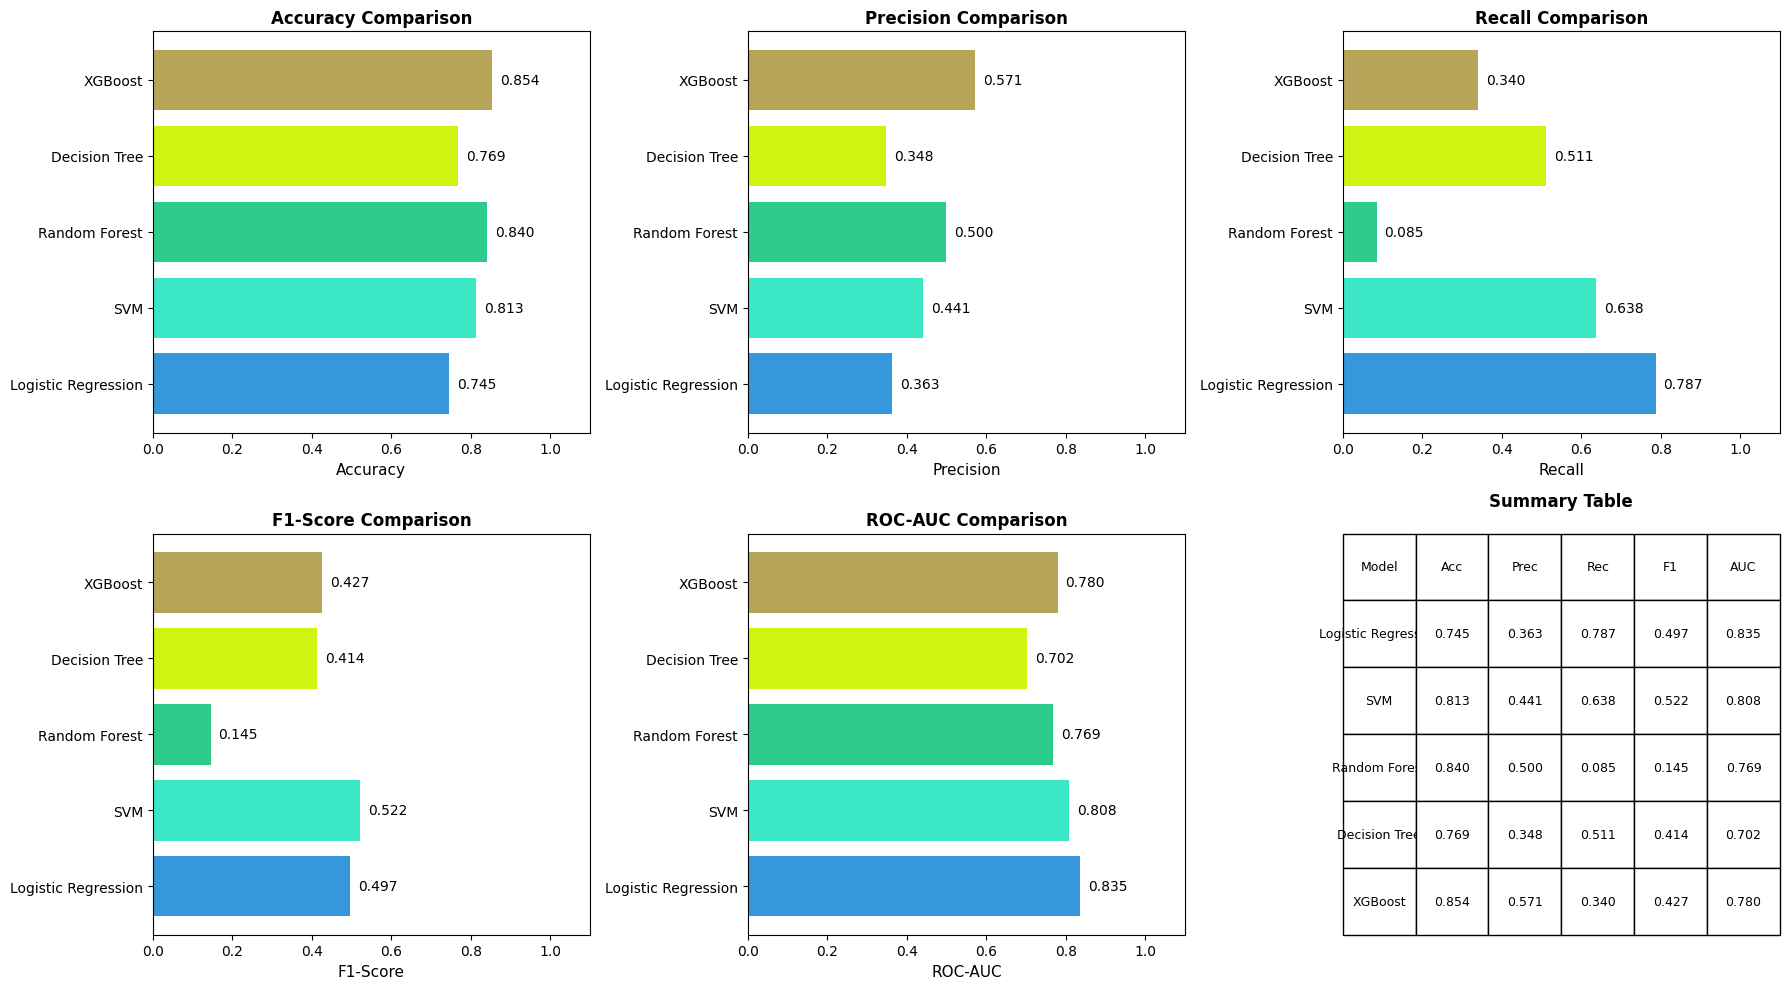

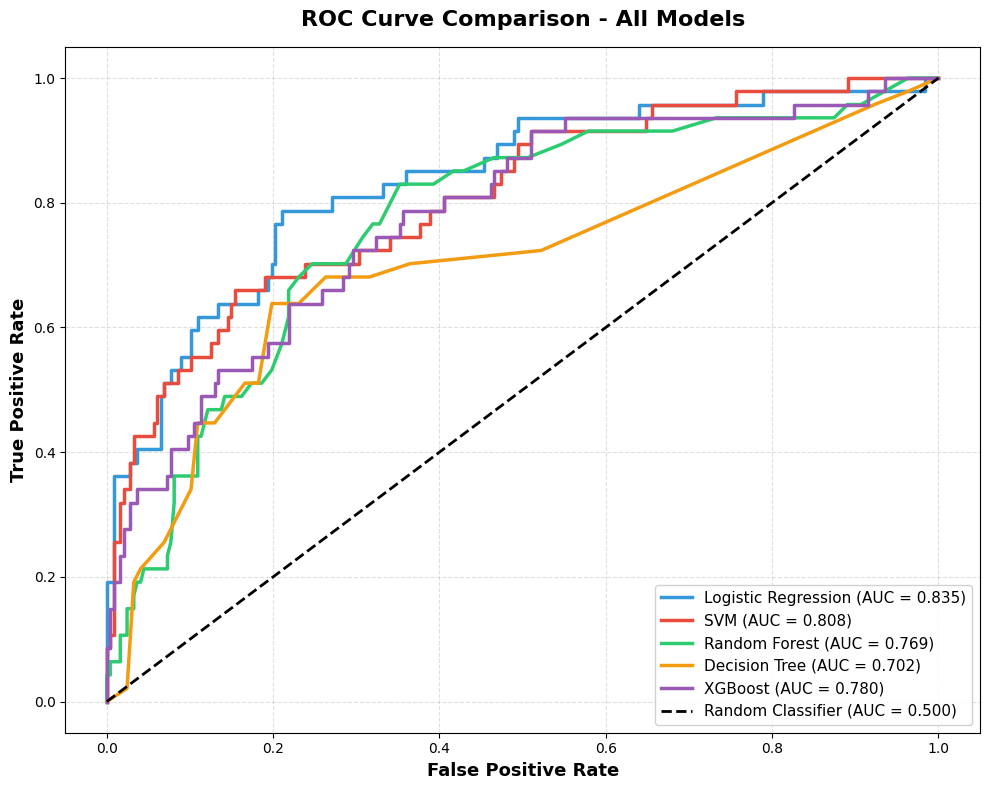

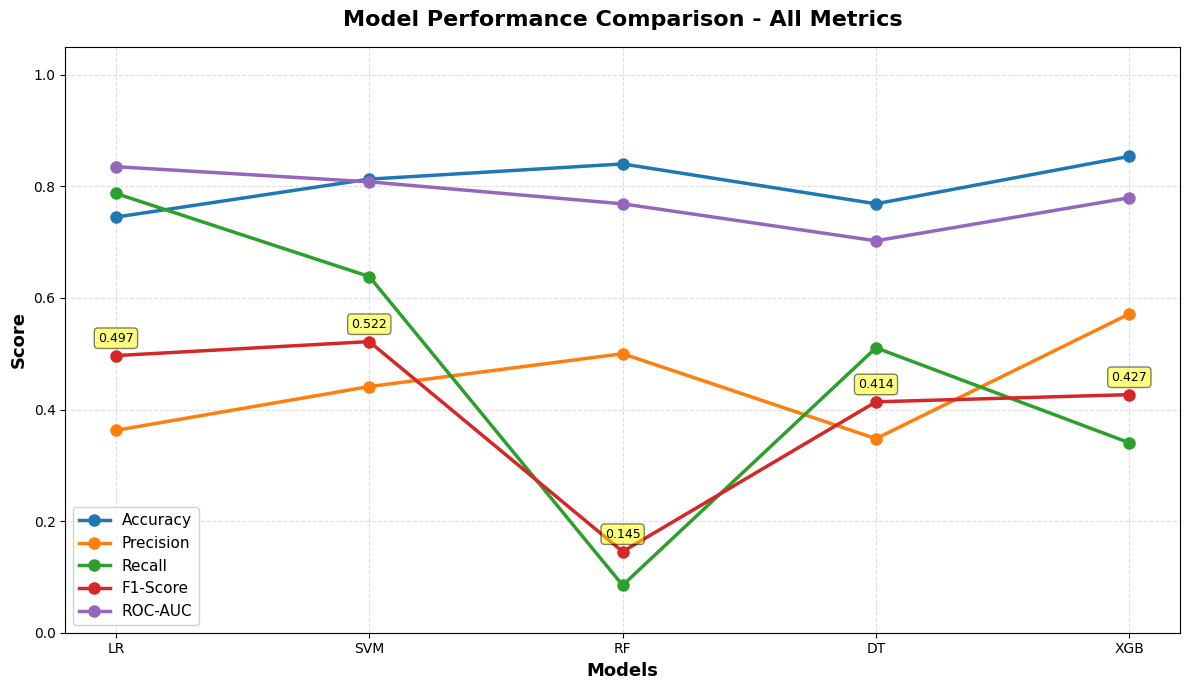

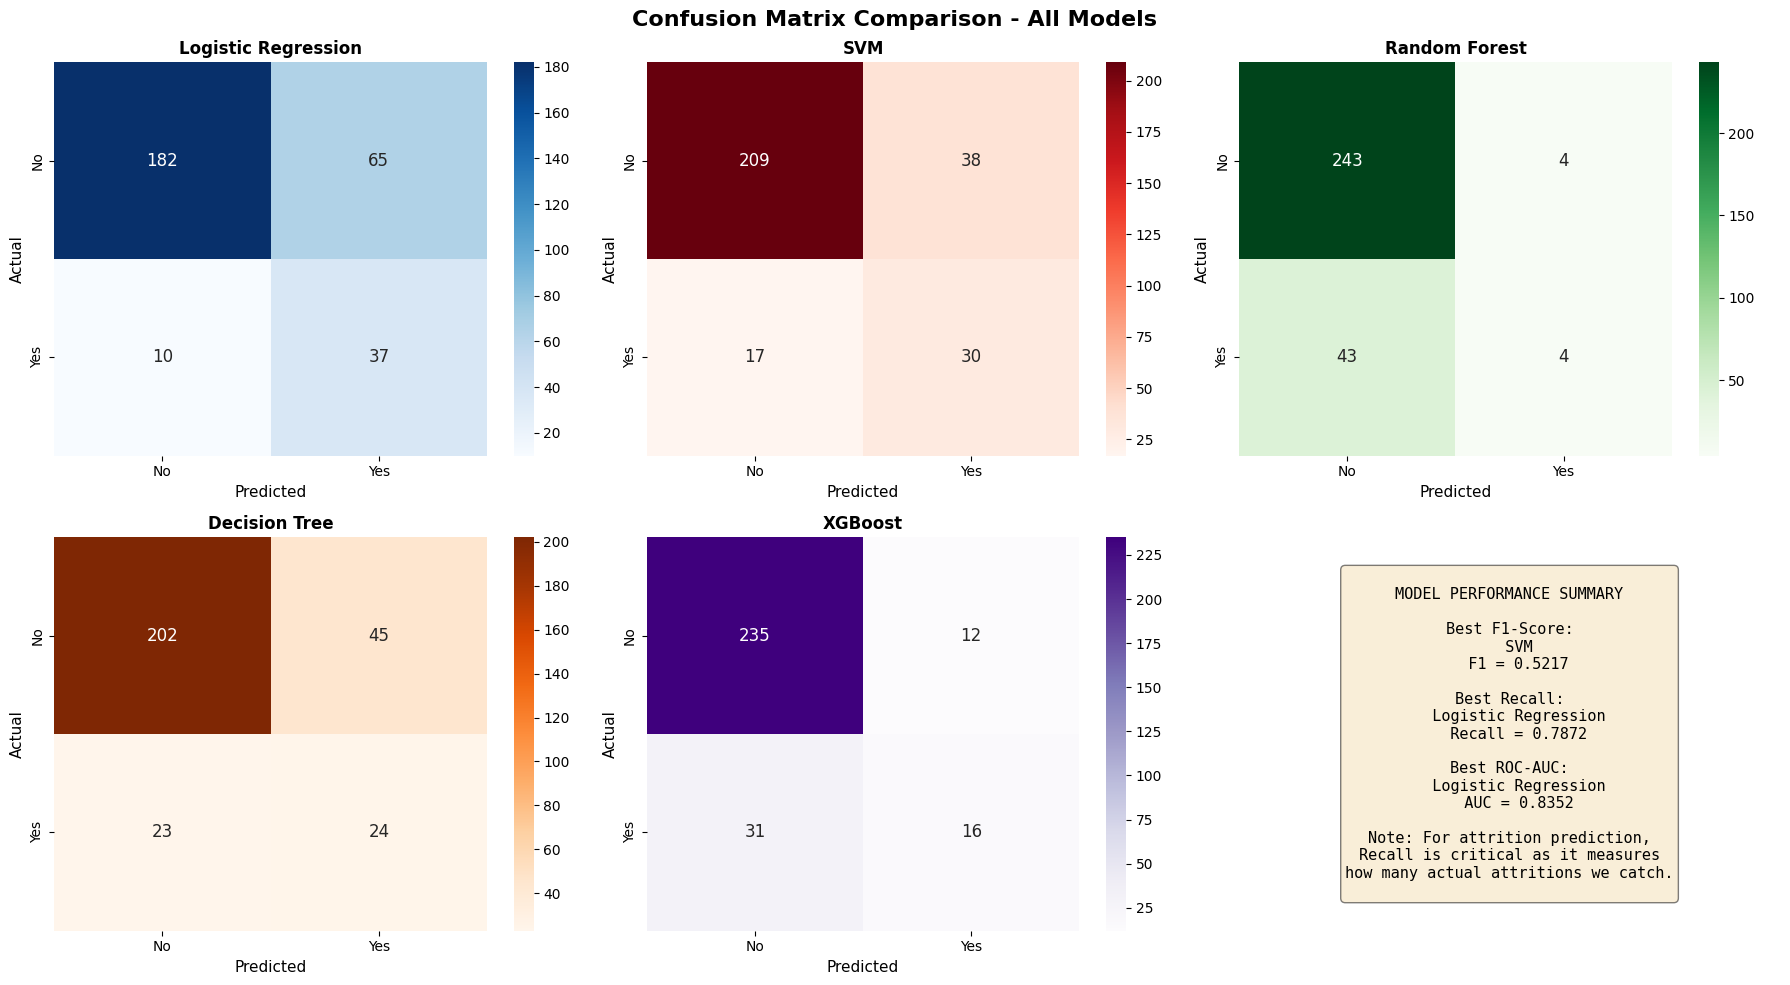

In [130]:

print("\n" + "=" * 60)
print("MODEL COMPARISON SUMMARY")
print("=" * 60)

# Create comparison dataframe with all metrics
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree', 'XGBoost'],
    'Accuracy': [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_dt, accuracy_xgb],
    'Precision': [precision_lr, precision_svm, precision_rf, precision_dt, precision_xgb],
    'Recall': [recall_lr, recall_svm, recall_rf, recall_dt, recall_xgb],
    'F1-Score': [f1_lr, f1_svm, f1_rf, f1_dt, f1_xgb],
    'ROC-AUC': [roc_auc_lr, roc_auc_svm, roc_auc_rf, roc_auc_dt, roc_auc_xgb]
})

print("\n", comparison_df.to_string(index=False))

# Visualize model comparison for basic metrics (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', "#3ce7c5", "#2ecc8a", "#d1f312", "#b6a559"]

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.bar(comparison_df['Model'], comparison_df[metric], color=colors)
    ax.set_title(f'{metric} Comparison', fontweight='bold', fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_ylim([0, 1.1])
    ax.tick_params(axis='x', rotation=45)
    # Add value labels on bars
    for i, v in enumerate(comparison_df[metric]):
        ax.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Create comprehensive comparison visualization (2x3 grid)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

all_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for idx, metric in enumerate(all_metrics):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    bars = ax.barh(comparison_df['Model'], comparison_df[metric], color=colors)
    ax.set_title(f'{metric} Comparison', fontweight='bold', fontsize=12)
    ax.set_xlabel(metric, fontsize=11)
    ax.set_xlim([0, 1.1])
    # Add value labels
    for i, v in enumerate(comparison_df[metric]):
        ax.text(v + 0.02, i, f'{v:.3f}', va='center', fontsize=10)

# Use the last subplot for a summary table
ax = axes[1, 2]
ax.axis('tight')
ax.axis('off')
table_data = []
for idx, row in comparison_df.iterrows():
    table_data.append([row['Model'], f"{row['Accuracy']:.3f}", f"{row['Precision']:.3f}",
                       f"{row['Recall']:.3f}", f"{row['F1-Score']:.3f}", f"{row['ROC-AUC']:.3f}"])

table = ax.table(cellText=table_data,
                colLabels=['Model', 'Acc', 'Prec', 'Rec', 'F1', 'AUC'],
                cellLoc='center',
                loc='center',
                bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)
ax.set_title('Summary Table', fontweight='bold', fontsize=12, pad=20)

plt.tight_layout()
plt.savefig('model_comparison_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve Comparison - Plot all models on same graph
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})', linewidth=2.5, color='#3498db')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.3f})', linewidth=2.5, color='#e74c3c')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', linewidth=2.5, color='#2ecc71')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})', linewidth=2.5, color='#f39c12')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})', linewidth=2.5, color='#9b59b6')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.500)')
plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=13, fontweight='bold')
plt.title('ROC Curve Comparison - All Models', fontsize=16, fontweight='bold', pad=15)
plt.legend(loc='lower right', fontsize=11, framealpha=0.9)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('roc_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Create line graph comparison for all metrics
plt.figure(figsize=(12, 7))

metrics_for_line = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
model_names_short = ['LR', 'SVM', 'RF', 'DT', 'XGB']

for metric in metrics_for_line:
    plt.plot(model_names_short, comparison_df[metric],
             marker='o', linewidth=2.5, markersize=8, label=metric)

plt.xlabel('Models', fontsize=13, fontweight='bold')
plt.ylabel('Score', fontsize=13, fontweight='bold')
plt.title('Model Performance Comparison - All Metrics', fontsize=16, fontweight='bold', pad=15)
plt.legend(loc='best', fontsize=11, framealpha=0.9)
plt.grid(True, linestyle='--', alpha=0.4)
plt.ylim([0, 1.05])

# Add value annotations for F1-Score (primary metric)
for idx, (model, f1_val) in enumerate(zip(model_names_short, comparison_df['F1-Score'])):
    plt.annotate(f'{f1_val:.3f}',
                xy=(idx, f1_val),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.savefig('model_comparison_line_graph.png', dpi=300, bbox_inches='tight')
plt.show()



# Create confusion matrix comparison visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
cms = [cm_lr, cm_svm, cm_rf, cm_dt, cm_xgb]
model_names = ['Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree', 'XGBoost']
cmaps = ['Blues', 'Reds', 'Greens', 'Oranges', 'Purples']

for idx, (cm, name, cmap) in enumerate(zip(cms, model_names, cmaps)):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    sns.heatmap(cm, annot=True, fmt='g', cmap=cmap, ax=ax,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'],
                cbar=True, annot_kws={'fontsize': 12})
    ax.set_title(f'{name}', fontweight='bold', fontsize=12)
    ax.set_xlabel('Predicted', fontsize=11)
    ax.set_ylabel('Actual', fontsize=11)

# Hide the last subplot and use it for summary statistics
axes[1, 2].axis('off')

# Add overall performance summary in the empty subplot
ax = axes[1, 2]
best_f1 = comparison_df.loc[comparison_df['F1-Score'].idxmax()]
best_recall = comparison_df.loc[comparison_df['Recall'].idxmax()]
best_auc = comparison_df.loc[comparison_df['ROC-AUC'].idxmax()]

summary_text = f"""
MODEL PERFORMANCE SUMMARY

Best F1-Score:
  {best_f1['Model']}
  F1 = {best_f1['F1-Score']:.4f}

Best Recall:
  {best_recall['Model']}
  Recall = {best_recall['Recall']:.4f}

Best ROC-AUC:
  {best_auc['Model']}
  AUC = {best_auc['ROC-AUC']:.4f}

Note: For attrition prediction,
Recall is critical as it measures
how many actual attritions we catch.
"""

ax.text(0.5, 0.5, summary_text,
        transform=ax.transAxes,
        fontsize=11,
        verticalalignment='center',
        horizontalalignment='center',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
        family='monospace')

plt.suptitle('Confusion Matrix Comparison - All Models',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('confusion_matrix_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


Model Selection Conclusion

Based on comprehensive evaluation of 5 classification models, LOGISTIC REGRESSION is selected as the optimal model for employee attrition prediction.

Logistic Regression with class_weight='balanced' as the best model.It
achieves highest recall (78.7%), highest ROC-AUC (0.835), and provides
interpretable coefficients enabling HR to understand attrition drivers
(OverTime, MonthlyIncome, YearsSinceLastPromotion) for targeted interventions.

# Phase 2 : Improvement Strategy Analysis

# SMOTE Validation across All Algorithms
---
Objective: Test all 5 ML models with SMOTE to validate Logistic Regression as the best choice

* Train-test split (80-20)
* Apply SMOTE on training dataset
* Train all 5 models on balanced data
* Compare performance on test set
* Generate comparison table + confusion matrices




ADDITIONAL ANALYSIS: Testing SMOTE with All ML Models
Objective: Validate that Logistic Regression remains the best choice
           even when SMOTE is applied to all algorithms

Creating train-test split for validation
Training set: 1176 samples
Test set: 294 samples
Train attrition rate: 16.16%
Test attrition rate: 15.99%

Converting to arrays for SMOTE compatibility...

Applying SMOTE to training data...
Before SMOTE - Class 0: 986, Class 1: 190
After SMOTE  - Class 0: 986, Class 1: 986
Original training samples: 1176
After SMOTE: 1972 samples
New samples created: 796

------------------------------------------------------------
Testing Model 1: Logistic Regression with SMOTE
------------------------------------------------------------
Accuracy:  0.7381
Precision: 0.3529
Recall:    0.7660
F1-Score:  0.4832

------------------------------------------------------------
Testing Model 2: SVM with SMOTE
------------------------------------------------------------
Accuracy:  0.8605
Prec

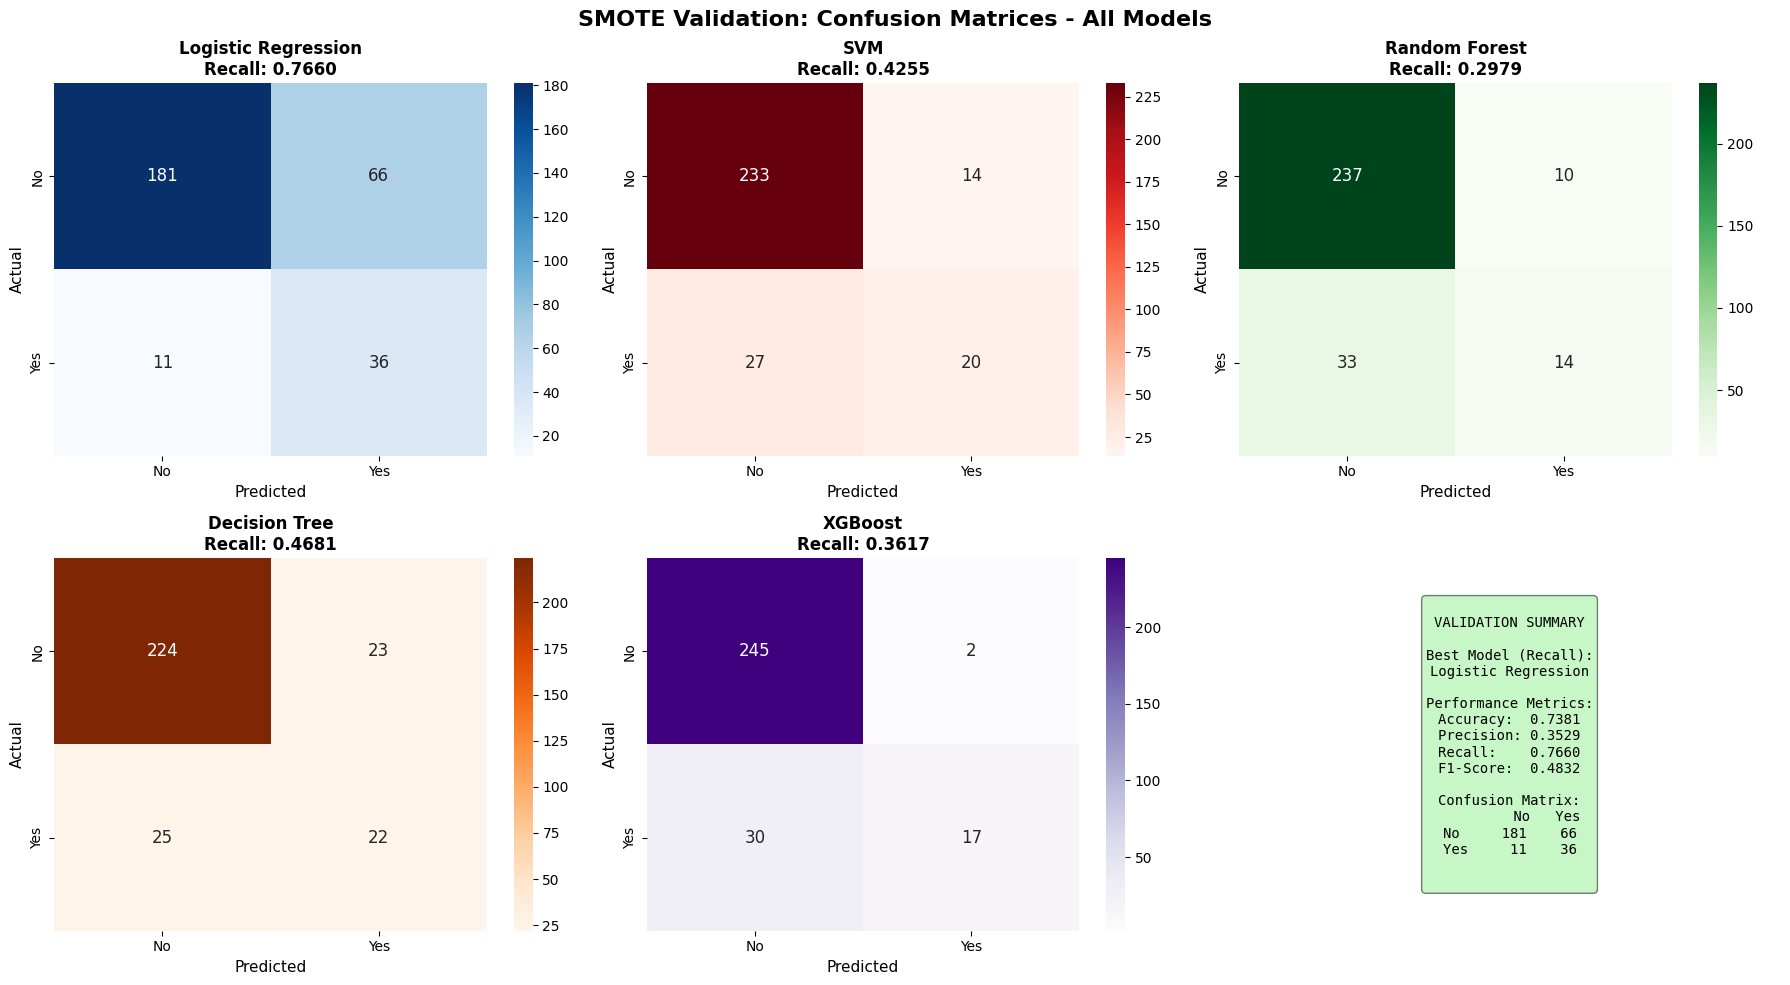


SMOTE VALIDATION COMPLETE


In [131]:

# SMOTE VALIDATION ACROSS ALL MODELS

print("\n" + "=" * 80)
print("ADDITIONAL ANALYSIS: Testing SMOTE with All ML Models")
print("=" * 80)
print("Objective: Validate that Logistic Regression remains the best choice")
print("           even when SMOTE is applied to all algorithms")
print("=" * 80)

# Fresh train-test split (same as original)
print("\nCreating train-test split for validation")
X_val = df_processed.drop('Attrition', axis=1)
y_val = df_processed['Attrition']

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X_val, y_val,
    test_size=0.2,
    random_state=42,
    stratify=y_val
)

print(f"Training set: {len(y_train_val)} samples")
print(f"Test set: {len(y_test_val)} samples")
print(f"Train attrition rate: {y_train_val.mean()*100:.2f}%")
print(f"Test attrition rate: {y_test_val.mean()*100:.2f}%")

# Convert to arrays to avoid dtype issues with SMOTE
print("\nConverting to arrays for SMOTE compatibility...")
X_train_val_array = X_train_val.values if hasattr(X_train_val, 'values') else X_train_val
y_train_val_array = y_train_val.values if hasattr(y_train_val, 'values') else y_train_val
X_test_val_array = X_test_val.values if hasattr(X_test_val, 'values') else X_test_val

# Apply SMOTE
print("\nApplying SMOTE to training data...")
print(f"Before SMOTE - Class 0: {sum(y_train_val == 0)}, Class 1: {sum(y_train_val == 1)}")

smote_all = SMOTE(random_state=42, k_neighbors=5)
X_train_smote_all, y_train_smote_all = smote_all.fit_resample(X_train_val_array, y_train_val_array)

print(f"After SMOTE  - Class 0: {sum(y_train_smote_all == 0)}, Class 1: {sum(y_train_smote_all == 1)}")
print(f"Original training samples: {len(y_train_val)}")
print(f"After SMOTE: {len(y_train_smote_all)} samples")
print(f"New samples created: {len(y_train_smote_all) - len(y_train_val)}")

# Scale data
scaler_all = StandardScaler()
X_train_smote_all_scaled = scaler_all.fit_transform(X_train_smote_all)
X_test_all_scaled = scaler_all.transform(X_test_val_array)

# Decision threshold for recall optimization
THRESHOLD = 0.47

# Store results for all models
all_models_results = []


# MODEL 1: LOGISTIC REGRESSION (with SMOTE)

print("\n" + "-" * 60)
print("Testing Model 1: Logistic Regression with SMOTE")
print("-" * 60)

lr_smote = LogisticRegression(random_state=42, max_iter=1000)
lr_smote.fit(X_train_smote_all_scaled, y_train_smote_all)

y_pred_proba_lr_smote = lr_smote.predict_proba(X_test_all_scaled)[:, 1]
y_pred_lr_smote = (y_pred_proba_lr_smote > THRESHOLD).astype(int)

acc_lr_smote = accuracy_score(y_test_val, y_pred_lr_smote)
prec_lr_smote = precision_score(y_test_val, y_pred_lr_smote)
rec_lr_smote = recall_score(y_test_val, y_pred_lr_smote)
f1_lr_smote = f1_score(y_test_val, y_pred_lr_smote)
cm_lr_smote = confusion_matrix(y_test_val, y_pred_lr_smote)

print(f"Accuracy:  {acc_lr_smote:.4f}")
print(f"Precision: {prec_lr_smote:.4f}")
print(f"Recall:    {rec_lr_smote:.4f}")
print(f"F1-Score:  {f1_lr_smote:.4f}")

all_models_results.append({
    'Model': 'Logistic Regression',
    'Accuracy': acc_lr_smote,
    'Precision': prec_lr_smote,
    'Recall': rec_lr_smote,
    'F1-Score': f1_lr_smote,
    'CM': cm_lr_smote
})


# MODEL 2: SVM (with SMOTE)

print("\n" + "-" * 60)
print("Testing Model 2: SVM with SMOTE")
print("-" * 60)

svm_smote = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
svm_smote.fit(X_train_smote_all_scaled, y_train_smote_all)

y_pred_proba_svm_smote = svm_smote.predict_proba(X_test_all_scaled)[:, 1]
y_pred_svm_smote = (y_pred_proba_svm_smote > THRESHOLD).astype(int)

acc_svm_smote = accuracy_score(y_test_val, y_pred_svm_smote)
prec_svm_smote = precision_score(y_test_val, y_pred_svm_smote)
rec_svm_smote = recall_score(y_test_val, y_pred_svm_smote)
f1_svm_smote = f1_score(y_test_val, y_pred_svm_smote)
cm_svm_smote = confusion_matrix(y_test_val, y_pred_svm_smote)

print(f"Accuracy:  {acc_svm_smote:.4f}")
print(f"Precision: {prec_svm_smote:.4f}")
print(f"Recall:    {rec_svm_smote:.4f}")
print(f"F1-Score:  {f1_svm_smote:.4f}")

all_models_results.append({
    'Model': 'SVM',
    'Accuracy': acc_svm_smote,
    'Precision': prec_svm_smote,
    'Recall': rec_svm_smote,
    'F1-Score': f1_svm_smote,
    'CM': cm_svm_smote
})


# MODEL 3: RANDOM FOREST (with SMOTE)

print("\n" + "-" * 60)
print("Testing Model 3: Random Forest with SMOTE")
print("-" * 60)

rf_smote = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
rf_smote.fit(X_train_smote_all_scaled, y_train_smote_all)

y_pred_proba_rf_smote = rf_smote.predict_proba(X_test_all_scaled)[:, 1]
y_pred_rf_smote = (y_pred_proba_rf_smote > THRESHOLD).astype(int)

acc_rf_smote = accuracy_score(y_test_val, y_pred_rf_smote)
prec_rf_smote = precision_score(y_test_val, y_pred_rf_smote)
rec_rf_smote = recall_score(y_test_val, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test_val, y_pred_rf_smote)
cm_rf_smote = confusion_matrix(y_test_val, y_pred_rf_smote)

print(f"Accuracy:  {acc_rf_smote:.4f}")
print(f"Precision: {prec_rf_smote:.4f}")
print(f"Recall:    {rec_rf_smote:.4f}")
print(f"F1-Score:  {f1_rf_smote:.4f}")

all_models_results.append({
    'Model': 'Random Forest',
    'Accuracy': acc_rf_smote,
    'Precision': prec_rf_smote,
    'Recall': rec_rf_smote,
    'F1-Score': f1_rf_smote,
    'CM': cm_rf_smote
})


# MODEL 4: DECISION TREE (with SMOTE)

print("\n" + "-" * 60)
print("Testing Model 4: Decision Tree with SMOTE")
print("-" * 60)

dt_smote = DecisionTreeClassifier(random_state=200, max_depth=5, min_samples_leaf=20)
dt_smote.fit(X_train_smote_all, y_train_smote_all)  # Trees don't need scaling

y_pred_proba_dt_smote = dt_smote.predict_proba(X_test_val_array)[:, 1]
y_pred_dt_smote = (y_pred_proba_dt_smote > THRESHOLD).astype(int)

acc_dt_smote = accuracy_score(y_test_val, y_pred_dt_smote)
prec_dt_smote = precision_score(y_test_val, y_pred_dt_smote)
rec_dt_smote = recall_score(y_test_val, y_pred_dt_smote)
f1_dt_smote = f1_score(y_test_val, y_pred_dt_smote)
cm_dt_smote = confusion_matrix(y_test_val, y_pred_dt_smote)

print(f"Accuracy:  {acc_dt_smote:.4f}")
print(f"Precision: {prec_dt_smote:.4f}")
print(f"Recall:    {rec_dt_smote:.4f}")
print(f"F1-Score:  {f1_dt_smote:.4f}")

all_models_results.append({
    'Model': 'Decision Tree',
    'Accuracy': acc_dt_smote,
    'Precision': prec_dt_smote,
    'Recall': rec_dt_smote,
    'F1-Score': f1_dt_smote,
    'CM': cm_dt_smote
})


# MODEL 5: XGBOOST (with SMOTE)

print("\n" + "-" * 60)
print("Testing Model 5: XGBoost with SMOTE")
print("-" * 60)

dtrain_smote = xgb.DMatrix(X_train_smote_all_scaled, label=y_train_smote_all)
dtest_smote = xgb.DMatrix(X_test_all_scaled, label=y_test_val)

params_smote = {
    'objective': 'binary:logistic',
    'eta': 0.1,
    'max_depth': 6,
    'eval_metric': 'logloss',
    'seed': 42
}

xgb_smote_model = xgb.train(params_smote, dtrain_smote, 100)
y_pred_proba_xgb_smote = xgb_smote_model.predict(dtest_smote)
y_pred_xgb_smote = (y_pred_proba_xgb_smote > THRESHOLD).astype(int)

acc_xgb_smote = accuracy_score(y_test_val, y_pred_xgb_smote)
prec_xgb_smote = precision_score(y_test_val, y_pred_xgb_smote)
rec_xgb_smote = recall_score(y_test_val, y_pred_xgb_smote)
f1_xgb_smote = f1_score(y_test_val, y_pred_xgb_smote)
cm_xgb_smote = confusion_matrix(y_test_val, y_pred_xgb_smote)

print(f"Accuracy:  {acc_xgb_smote:.4f}")
print(f"Precision: {prec_xgb_smote:.4f}")
print(f"Recall:    {rec_xgb_smote:.4f}")
print(f"F1-Score:  {f1_xgb_smote:.4f}")

all_models_results.append({
    'Model': 'XGBoost',
    'Accuracy': acc_xgb_smote,
    'Precision': prec_xgb_smote,
    'Recall': rec_xgb_smote,
    'F1-Score': f1_xgb_smote,
    'CM': cm_xgb_smote
})


# COMPARISON TABLE: ALL MODELS WITH SMOTE

print("\n" + "=" * 80)
print("SMOTE VALIDATION RESULTS - ALL MODELS COMPARISON")
print("=" * 80)

comparison_all_df = pd.DataFrame([{
    'Model': r['Model'],
    'Accuracy': r['Accuracy'],
    'Precision': r['Precision'],
    'Recall': r['Recall'],
    'F1-Score': r['F1-Score']
} for r in all_models_results])

print("\n" + comparison_all_df.to_string(index=False))

# Find best models
best_by_recall_all = max(all_models_results, key=lambda x: x['Recall'])
best_by_f1_all = max(all_models_results, key=lambda x: x['F1-Score'])

print("\n" + "-" * 80)
print("BEST PERFORMING MODELS (with SMOTE + Threshold={})".format(THRESHOLD))
print("-" * 80)
print(f"Best by Recall:    {best_by_recall_all['Model']:<20} (Recall: {best_by_recall_all['Recall']:.4f})")
print(f"Best by F1-Score:  {best_by_f1_all['Model']:<20} (F1: {best_by_f1_all['F1-Score']:.4f})")


# VISUALIZATION: CONFUSION MATRICES ONLY

print("\n" + "=" * 80)
print("Generating Confusion Matrix Visualization")
print("=" * 80)

fig_smote_cm = plt.figure(figsize=(18, 10))
cmaps_all = ['Blues', 'Reds', 'Greens', 'Oranges', 'Purples']

for idx, result in enumerate(all_models_results):
    row = idx // 3
    col = idx % 3
    ax = plt.subplot(2, 3, idx + 1)

    sns.heatmap(result['CM'], annot=True, fmt='g', cmap=cmaps_all[idx], ax=ax,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'],
                cbar=True, annot_kws={'fontsize': 12})
    ax.set_title(f"{result['Model']}\nRecall: {result['Recall']:.4f}",
                 fontweight='bold', fontsize=12)
    ax.set_xlabel('Predicted', fontsize=11)
    ax.set_ylabel('Actual', fontsize=11)

# Summary in empty subplot
ax = plt.subplot(2, 3, 6)
ax.axis('off')

summary_text = f"""
VALIDATION SUMMARY

Best Model (Recall):
{best_by_recall_all['Model']}

Performance Metrics:
Accuracy:  {best_by_recall_all['Accuracy']:.4f}
Precision: {best_by_recall_all['Precision']:.4f}
Recall:    {best_by_recall_all['Recall']:.4f}
F1-Score:  {best_by_recall_all['F1-Score']:.4f}

Confusion Matrix:
         No   Yes
No    {best_by_recall_all['CM'][0,0]:4d}  {best_by_recall_all['CM'][0,1]:4d}
Yes   {best_by_recall_all['CM'][1,0]:4d}  {best_by_recall_all['CM'][1,1]:4d}

"""
# Threshold: {THRESHOLD}
ax.text(0.5, 0.5, summary_text,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='center',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5),
        family='monospace')

plt.suptitle('SMOTE Validation: Confusion Matrices - All Models',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('smote_all_models_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 80)
print("SMOTE VALIDATION COMPLETE")
print("=" * 80)


# Improvement Strategy Analysis with Hyperparameter Tuning
---
Comparing three scenario to see which model performance is the best
* Baseline
* Hyperparameter Tuning
* SMOTE + Hyperparameter Tuning


Phase 2: Improvement Strategy Analysis

SCENARIO 1: Baseline (From Phase 1)
Accuracy:  0.7449
Precision: 0.3627
Recall:    0.7872
F1-Score:  0.4966
ROC-AUC:   0.8352
Confusion Matrix: TN=182, FP=65, FN=10, TP=37

SCENARIO 2: Hyperparameter Tuning Only
Running GridSearchCV
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best parameters: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV recall: 0.8316

Test Set Performance:
Accuracy:  0.5986
Precision: 0.2680
Recall:    0.8723
F1-Score:  0.4100
ROC-AUC:   0.8047
Confusion Matrix: TN=135, FP=112, FN=6, TP=41
Caught: 41/47 (87.2%), Missed: 6/47 (12.8%)

SCENARIO 3: SMOTE + Hyperparameter Tuning
Original training set: 1176 samples
After SMOTE: 1972 samples
  Class 0: 986
  Class 1: 986
  Ratio: 1.00:1 (balanced)

Running GridSearchCV on SMOTE data
Fitting 5 folds for each of 24 candidates, totalling 120 fits

GridSearchCV complete
Best parameters: {'C': 0.1, 'max_iter'

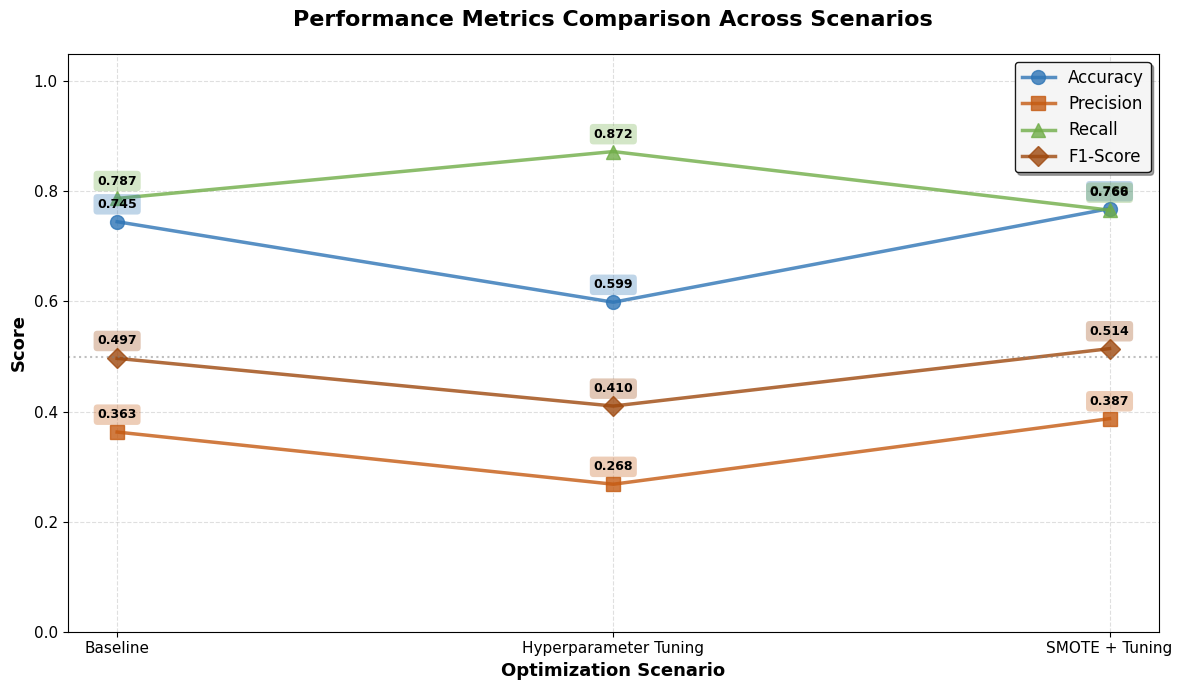

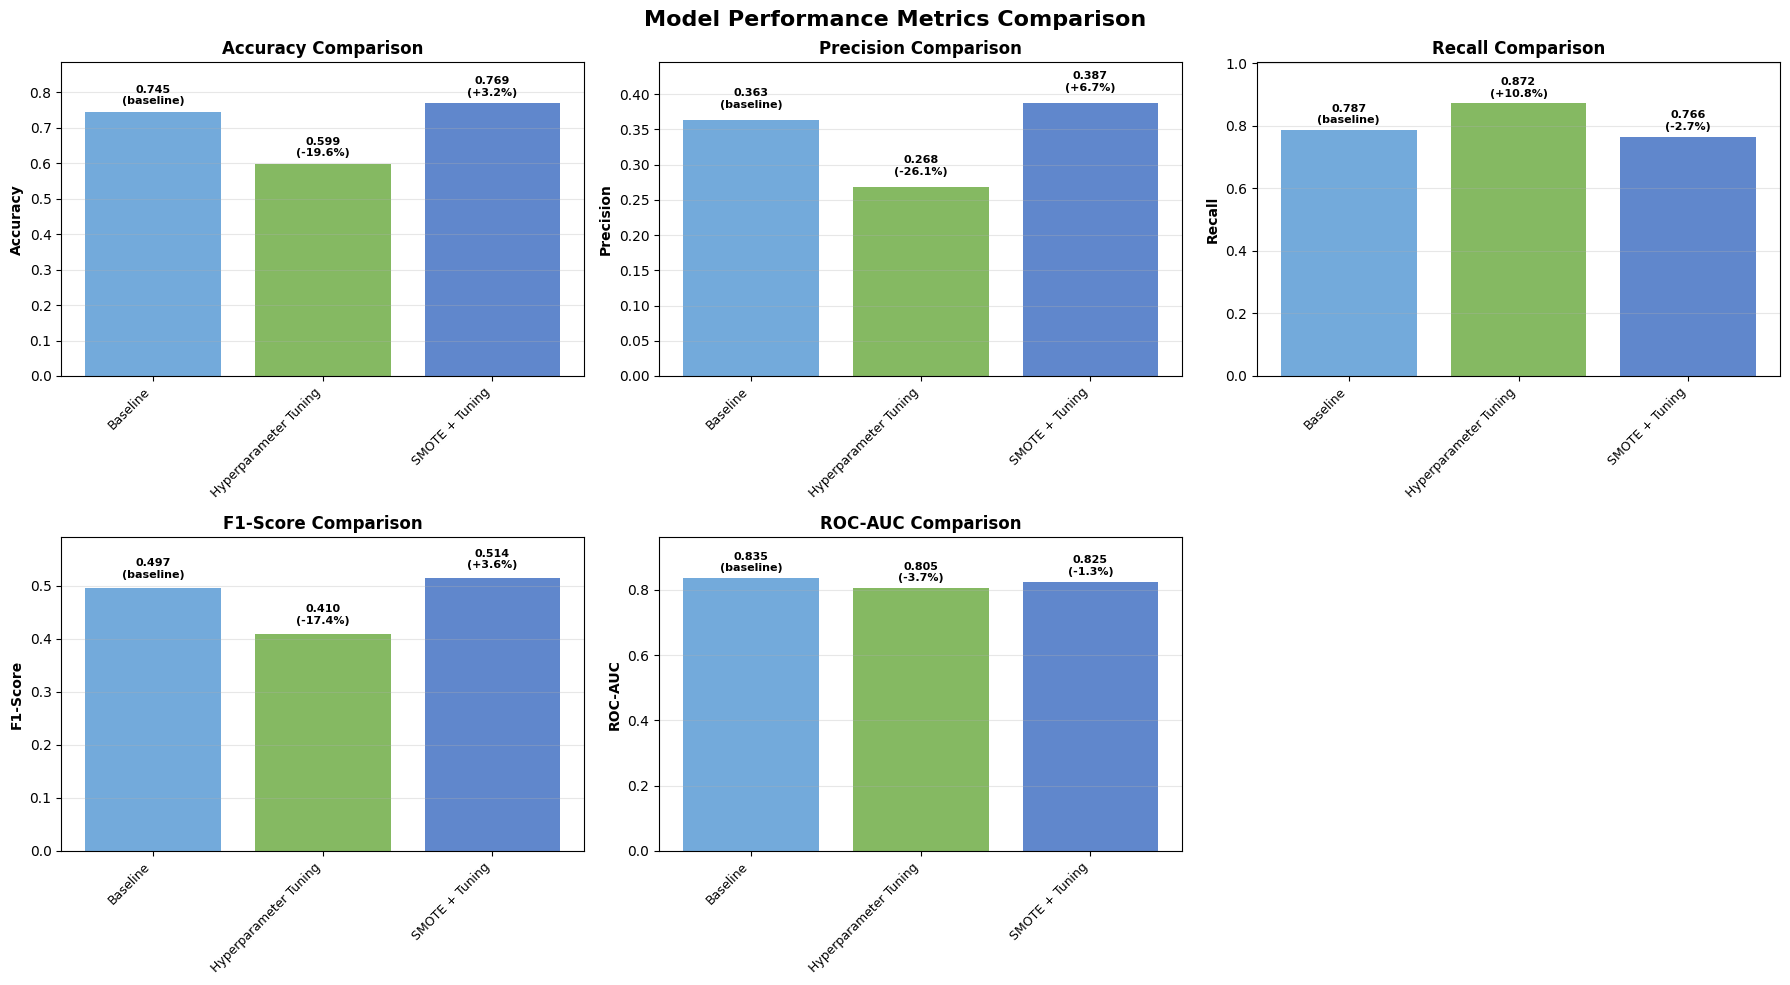

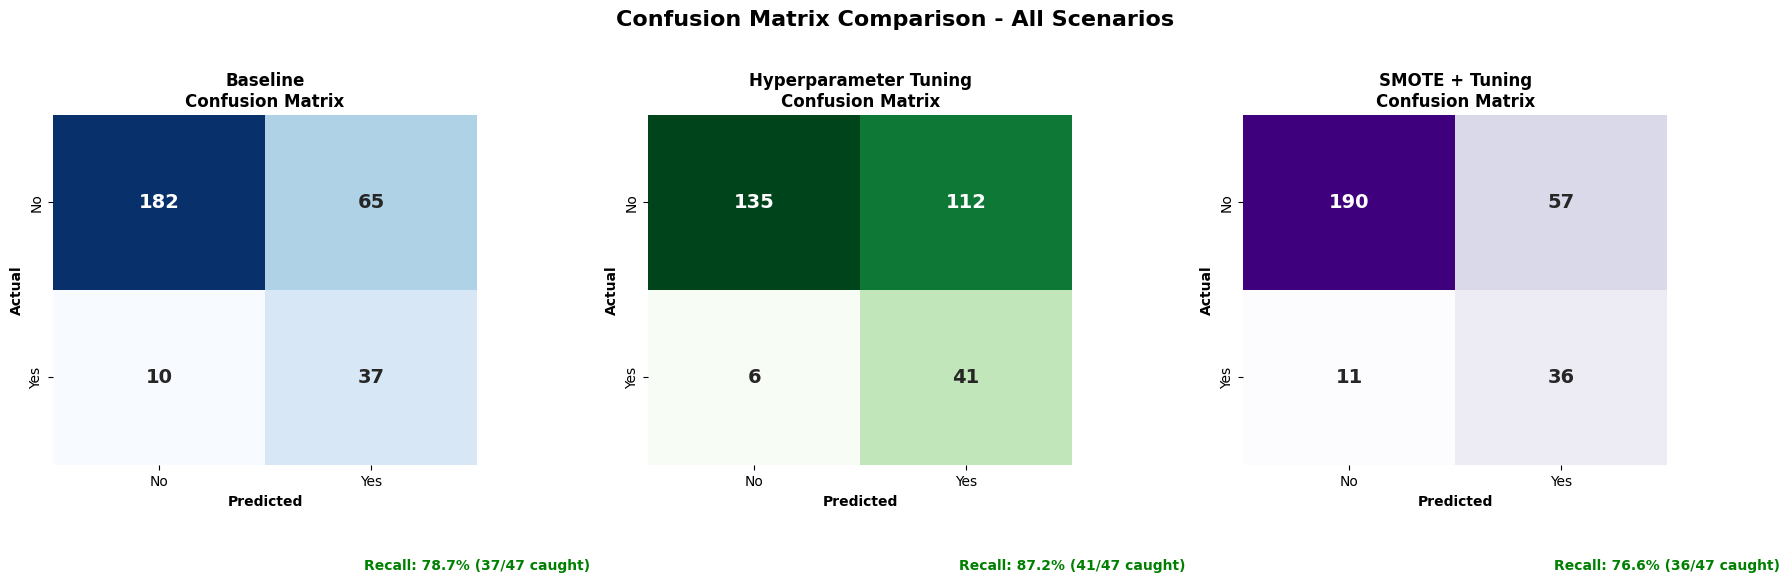

In [132]:
print("\n" + "=" * 80)
print("Phase 2: Improvement Strategy Analysis")
print("=" * 80)

# Store baseline metrics from Phase 1
metrics_baseline = {
    'Scenario': 'Baseline',
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1-Score': f1_lr,
    'ROC-AUC': roc_auc_lr
}

cm_baseline = cm_lr

# SCENARIO 1: Baseline (Already done in Phase 1)
print("\n" + "="*80)
print("SCENARIO 1: Baseline (From Phase 1)")
print("="*80)
print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1-Score:  {f1_lr:.4f}")
print(f"ROC-AUC:   {roc_auc_lr:.4f}")
print(f"Confusion Matrix: TN={cm_lr[0,0]}, FP={cm_lr[0,1]}, FN={cm_lr[1,0]}, TP={cm_lr[1,1]}")

# SCENARIO 2: Hyperparameter Tuning Only

print("\n" + "="*80)
print("SCENARIO 2: Hyperparameter Tuning Only")
print("="*80)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced'],
    'max_iter': [1000]
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Running GridSearchCV")
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV recall: {grid_search.best_score_:.4f}")

model_tuned = grid_search.best_estimator_
y_pred_tuned = model_tuned.predict(X_test_scaled)
y_pred_proba_tuned = model_tuned.predict_proba(X_test_scaled)[:, 1]

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"\nTest Set Performance:")
print(f"Accuracy:  {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall:    {recall_tuned:.4f}")
print(f"F1-Score:  {f1_tuned:.4f}")
print(f"ROC-AUC:   {roc_auc_tuned:.4f}")

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
tn, fp, fn, tp = cm_tuned.ravel()
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Caught: {tp}/{tp+fn} ({tp/(tp+fn)*100:.1f}%), Missed: {fn}/{tp+fn} ({fn/(tp+fn)*100:.1f}%)")

# Store metrics for comparison
metrics_tuned = {
    'Scenario': 'Hyperparameter Tuning',
    'Accuracy': accuracy_tuned,
    'Precision': precision_tuned,
    'Recall': recall_tuned,
    'F1-Score': f1_tuned,
    'ROC-AUC': roc_auc_tuned
}

# SCENARIO 3: SMOTE + Hyperparameter Tuning


print("\n" + "="*80)
print("SCENARIO 3: SMOTE + Hyperparameter Tuning")
print("="*80)

# Convert training data to numpy arrays to avoid dtype issues
X_train_array = X_train.values if hasattr(X_train, 'values') else X_train
y_train_array = y_train.values if hasattr(y_train, 'values') else y_train

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train_array, y_train_array)

print(f"Original training set: {len(X_train)} samples")
print(f"After SMOTE: {len(X_train_smote)} samples")
print(f"  Class 0: {(y_train_smote==0).sum()}")
print(f"  Class 1: {(y_train_smote==1).sum()}")
print(f"  Ratio: {(y_train_smote==0).sum()/(y_train_smote==1).sum():.2f}:1 (balanced)")

# Scale SMOTE data
scaler_smote = StandardScaler()
X_train_smote_scaled = scaler_smote.fit_transform(X_train_smote)
X_test_array = X_test.values if hasattr(X_test, 'values') else X_test
X_test_scaled_smote = scaler_smote.transform(X_test_array)

# Parameter grid for SMOTE (no class_weight needed since data is balanced)
param_grid_smote = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

print("\nRunning GridSearchCV on SMOTE data")
grid_search_smote = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_smote,
    cv=cv_strategy,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search_smote.fit(X_train_smote_scaled, y_train_smote)

print(f"\nGridSearchCV complete")
print(f"Best parameters: {grid_search_smote.best_params_}")
print(f"Best CV recall: {grid_search_smote.best_score_:.4f}")

# Get best model and evaluate
model_combined = grid_search_smote.best_estimator_
y_pred_combined = model_combined.predict(X_test_scaled_smote)
y_pred_proba_combined = model_combined.predict_proba(X_test_scaled_smote)[:, 1]

accuracy_combined = accuracy_score(y_test, y_pred_combined)
precision_combined = precision_score(y_test, y_pred_combined)
recall_combined = recall_score(y_test, y_pred_combined)
f1_combined = f1_score(y_test, y_pred_combined)
roc_auc_combined = roc_auc_score(y_test, y_pred_proba_combined)

print(f"\nTest Set Performance:")
print(f"Accuracy:  {accuracy_combined:.4f}")
print(f"Precision: {precision_combined:.4f}")
print(f"Recall:    {recall_combined:.4f}")
print(f"F1-Score:  {f1_combined:.4f}")
print(f"ROC-AUC:   {roc_auc_combined:.4f}")

cm_combined = confusion_matrix(y_test, y_pred_combined)
tn, fp, fn, tp = cm_combined.ravel()
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Caught: {tp}/{tp+fn} ({tp/(tp+fn)*100:.1f}%), Missed: {fn}/{tp+fn} ({fn/(tp+fn)*100:.1f}%)")

metrics_combined = {
    'Scenario': 'SMOTE + Tuning',
    'Accuracy': accuracy_combined,
    'Precision': precision_combined,
    'Recall': recall_combined,
    'F1-Score': f1_combined,
    'ROC-AUC': roc_auc_combined
}

# Comprehensive Comparision

print("\n" + "="*80)
print("COMPREHENSIVE COMPARISON - ALL SCENARIOS")
print("="*80)

# Create comparison dataframe
results_df = pd.DataFrame([
    metrics_baseline,
    metrics_tuned,
    metrics_combined
])

print("\n" + results_df.to_string(index=False))

# Calculate improvements
print("\n" + "="*80)
print("IMPROVEMENT ANALYSIS (vs Baseline)")
print("="*80)

for idx, row in results_df.iterrows():
    if idx == 0:  # Skip baseline
        continue

    print(f"\n{row['Scenario']}:")
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
        baseline_val = results_df.loc[0, metric]
        current_val = row[metric]
        improvement = ((current_val - baseline_val) / baseline_val) * 100
        print(f"  {metric:<12} {baseline_val:.4f} → {current_val:.4f} "
              f"({improvement:+.2f}%)")

# Visualizations
print("\n" + "="*80)
print("Generating Visualizations")
print("="*80)

# FIGURE 3: Line Chart - Metrics Across Scenarios
print("\nGenerating all Visualizations for Comparision")

fig3 = plt.figure(figsize=(12, 7))

# Prepare data
scenarios_list = results_df['Scenario'].values
metrics_for_line = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Define colors and markers for each metric
line_styles = {
    'Accuracy': {'color': '#2E75B6', 'marker': 'o', 'linewidth': 2.5, 'markersize': 10},
    'Precision': {'color': '#C55A11', 'marker': 's', 'linewidth': 2.5, 'markersize': 10},
    'Recall': {'color': '#70AD47', 'marker': '^', 'linewidth': 2.5, 'markersize': 10},
    'F1-Score': {'color': '#9E480E', 'marker': 'D', 'linewidth': 2.5, 'markersize': 10}
}

# Plot each metric
for metric in metrics_for_line:
    values = results_df[metric].values
    plt.plot(range(len(scenarios_list)), values,
             label=metric,
             color=line_styles[metric]['color'],
             marker=line_styles[metric]['marker'],
             linewidth=line_styles[metric]['linewidth'],
             markersize=line_styles[metric]['markersize'],
             alpha=0.8)

    # Add value labels on each point
    for i, val in enumerate(values):
        plt.annotate(f'{val:.3f}',
                    xy=(i, val),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center',
                    fontsize=9,
                    fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3',
                             facecolor=line_styles[metric]['color'],
                             alpha=0.3,
                             edgecolor='none'))

# Customize plot
plt.xlabel('Optimization Scenario', fontsize=13, fontweight='bold')
plt.ylabel('Score', fontsize=13, fontweight='bold')
plt.title('Performance Metrics Comparison Across Scenarios',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(range(len(scenarios_list)), scenarios_list, fontsize=11)
plt.yticks(fontsize=11)
plt.ylim([0, 1.05])
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)
plt.legend(loc='best', fontsize=12, framealpha=0.9,
          edgecolor='black', fancybox=True, shadow=True)

# Add horizontal line at 0.5 for reference
plt.axhline(y=0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.5, label='50% threshold')

plt.tight_layout()
plt.savefig('metrics_line_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# FIGURE 1: Metrics Comparison (Bar Charts)
fig1 = plt.figure(figsize=(18, 10))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

colors_phase2 = ['#5B9BD5', '#70AD47', '#4472C4']

for idx, metric in enumerate(metrics_to_plot, 1):
    ax = plt.subplot(2, 3, idx)
    values = results_df[metric].values
    bars = ax.bar(range(len(results_df)), values, color=colors_phase2,
                   alpha=0.85)

    ax.set_ylabel(metric, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontweight='bold', fontsize=12)
    ax.set_xticks(range(len(results_df)))
    ax.set_xticklabels(results_df['Scenario'], rotation=45, ha='right', fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0, max(values) * 1.15])

    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, values)):
        improvement = ((val - values[0]) / values[0]) * 100 if i > 0 else 0
        label = f'{val:.3f}\n({improvement:+.1f}%)' if i > 0 else f'{val:.3f}\n(baseline)'
        ax.text(bar.get_x() + bar.get_width()/2, val + 0.015, label,
                ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.suptitle('Model Performance Metrics Comparison', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


# FIGURE 2: Confusion Matrices Comparison
fig2 = plt.figure(figsize=(18, 6))

confusion_matrices = [cm_baseline, cm_tuned, cm_combined]
scenarios = results_df['Scenario'].values
cm_colors = ['Blues', 'Greens', 'Purples']

for idx, (cm, scenario, cmap) in enumerate(zip(confusion_matrices, scenarios, cm_colors), 1):
    ax = plt.subplot(1, 3, idx)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, ax=ax,
                annot_kws={'size': 14, 'weight': 'bold'})
    ax.set_title(f'{scenario}\nConfusion Matrix', fontweight='bold', fontsize=12)
    ax.set_xlabel('Predicted', fontweight='bold')
    ax.set_ylabel('Actual', fontweight='bold')
    ax.set_xticklabels(['No', 'Yes'])
    ax.set_yticklabels(['No', 'Yes'])

    # Add recall annotation
    tn_cm, fp_cm, fn_cm, tp_cm = cm.ravel()
    recall_cm = tp_cm / (tp_cm + fn_cm)
    ax.text(1, -0.3, f'Recall: {recall_cm:.1%} ({tp_cm}/{tp_cm+fn_cm} caught)',
            ha='center', fontsize=10, fontweight='bold', color='green',
            transform=ax.transAxes)

plt.suptitle('Confusion Matrix Comparison - All Scenarios', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('confusion_matrix_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
